<a href="https://colab.research.google.com/github/Eddythemachine/ziontechhub_hackathon_submission/blob/main/loan_risk_assesment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TABLE OF CONTENTS

- [About The Competition](#💡-About-The-Competition)
- [Importing Libs](#importing-libs)
- [Data Loading Pipeline](#1-data-loading-pipeline)
    - [Train Set](#train-set)
    - [Test Set](#test-set)
- [Exploratory Data Analysis (EDA)](#2-exploratory-data-analysis-eda)
    - [Data Set Top 5 Columns](#data-set-top-5-columns)
    - [Data Set Columns](#data-set-columns)
    - [Data Set Shape](#data-set-shape)
    - [Data Set Description](#data-set-description)
    - [Reseting Data Set Id](#reseting-data-set-id)
    - [Checking For Null Values in Data Sets](#checking-for-null-values-in-data-sets)
    - [Continuous Features](#continuous-features)
        - [Getting Continous Features (Numeric Features)](#getting-continous-features-numeric-features)
        - [Histogram](#histogram)
        - [Box-Plot](#box-plot)
        - [Density Plot](#density-plot)
        - [Scatter Plot](#scatter-plot)
    - [For Categorical Features](#for-categorical-features)
        - [Getting Categorical Features](#getting-categorical-features)
        - [Printing All Unique Items In Categorical Colum](#printing-all-unique-items-in-categorical-colum)
        - [Barchart](#barchart)
        - [Stacked Bar Plot](#stacked-bar-plot)
        - [Count Plot](#count-plot)
        - [HeatMap](#heatmap)
- [Insights From Visualisation/EDA](#insights-from-visualisationeda)
- [Data Cleaning and Preprocessing](#3-data-cleaning-and-preprocessing)
    - [Check if there's missing Values](#check-if-theres-missing-values)
    - [Check for Duplicates](#check-for-duplicates)
    - [Check for Invalid or Out-of-Range Values](#check-for-invalid-or-out-of-range-values)
- [Removing Duplicates](#removing-duplicates)
- [Feature Selection and Engineering](#4-feature-selection-and-engineering)
    - [Getting Mid Point of Ages](#getting-mid-point-of-ages)
    - [Adding features to boost algorithm](#adding-features-to-boost-algorithm)
- [Splitting Data Set](#splitting-data-set)
    - [Spliting Train Set Into Train Set and Test Set](#spliting-train-set-into-train-set-and-test-set)
    - [Removing Duplicate Income Row From Train Set](#removing-duplicate-income-row-from-train-set)
    - [Encoding Categorical Features for Train and Test Set](#encoding-categorical-features-for-train-and-test-set)
    - [Applying Standard Scalling](#applying-standard-scalling)
- [Model Development](#5-model-development)
    - [Train](#train)

# 💡 About The Competition :
Task:
The objective of this project is to predict whether a candidate is high-risk or low-risk based on their profile data (e.g., transaction patterns, financial indicators, behavioral traits, etc.). The outcome will guide decision-making in processes such as approvals, onboarding, or escalations.

---


Evaluation:
Model performance will be assessed using the following metrics:

Accuracy – Proportion of correctly classified candidates.

Precision – Proportion of correctly predicted high-risk candidates among all predicted high-risk candidates.

Recall (Sensitivity) – Proportion of actual high-risk candidates that were correctly identified.

F1-Score – Harmonic mean of precision and recall, balancing both false positives and false negatives.

ROC-AUC – Measures the model’s ability to distinguish between high-risk and low-risk classes across different thresholds.

Confusion Matrix – Provides a complete picture of true positives, false positives, true negatives, and false negatives.

# IMPORTING LIBS

In [1]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 3.4 MB/s eta 0:00:00


In [2]:
# Basic libraries
import pandas as pd
import numpy as np
import re
import warnings
import math

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# Model selection
from sklearn.model_selection import train_test_split

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

# Metrics
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

# First, ensure the library is installed (uncomment if needed)
# !pip install category_encoders

# Import encoders
from category_encoders import TargetEncoder, BinaryEncoder



# 📦 Explanation of Python Libraries Used in This Project

This section explains the purpose of each imported library or tool in simple terms, especially for non-technical readers.

---

## 🧰 Basic Libraries

| **Library** | **Purpose** |
|-------------|-------------|
| `pandas as pd` | Used for handling **data tables** (like Excel in Python). |
| `numpy as np` | Used for **numerical operations** and working with arrays. |
| `re` | Helps with **cleaning and searching text patterns** using regular expressions. |
| `warnings` | Used to **suppress warning messages** for cleaner outputs. |

---

## 📊 Data Visualization

| **Library** | **Purpose** |
|-------------|-------------|
| `matplotlib.pyplot as plt` | Creates **basic graphs and charts** (line plots, bar graphs, etc.). |
| `seaborn as sns` | Creates **beautiful and informative charts**, especially for statistical data. |

---

## 🧹 Data Preprocessing

| **Tool** | **Purpose** |
|----------|-------------|
| `StandardScaler` | Makes different features like income and age comparable by **scaling them**. |
| `LabelEncoder`, `OrdinalEncoder`, `OneHotEncoder` | Convert **textual data into numbers** for machine learning. |
| `ColumnTransformer` | Allows applying different transformations to different columns efficiently. |
| `Pipeline` | Chains multiple steps (e.g., cleaning, encoding, modeling) into **one streamlined process**. |
| `SMOTE` | Helps balance the dataset by creating **synthetic examples of the minority class** (e.g., risky applicants). |

---

## ⚙️ Model Selection

| **Tool** | **Purpose** |
|----------|-------------|
| `train_test_split` | Splits the dataset into a **training part** (to learn from) and a **testing part** (to evaluate on). |

---

## 🤖 Machine Learning Models

| **Model** | **Purpose** |
|-----------|-------------|
| `LogisticRegression` | A simple, fast model used for **binary predictions** (e.g., risky or not). |
| `DecisionTreeClassifier` | Makes decisions like a **flowchart** to classify data. |
| `RandomForestClassifier` | Combines many decision trees to improve accuracy. |
| `GradientBoostingClassifier`, `AdaBoostClassifier`, `ExtraTreesClassifier` | Advanced models that use **multiple learners working together** to make better predictions. |
| `SVC` (Support Vector Classifier) | Draws a boundary between classes in complex datasets. |
| `KNeighborsClassifier` | Looks at nearby similar records to decide the outcome. |
| `GaussianNB` | A simple, fast model that uses **probabilities** to make predictions. |
| `XGBClassifier` | A **very powerful model** often used in competitions for tough prediction problems. |

---

## 📏 Evaluation Metrics

| **Metric** | **Purpose** |
|------------|-------------|
| `accuracy_score` | Measures the **percentage of correct predictions**. |
| `roc_auc_score` | Evaluates how well the model **separates risky and non-risky applicants**. |
| `classification_report` | Provides detailed model performance metrics like **precision, recall, and F1 score**. |

---


# 1. DATA LOADING PIPELINE

### Train Set

In [3]:
!wget https://raw.githubusercontent.com/Eddythemachine/ziontechhub_hackathon/main/your_file.csv
file_path = 'your_file.csv'

def load_data_train(file_path: str, file_type: str = "csv", **kwargs):
    """Loads a dataset based on file type."""
    if file_type == "csv":
        df = pd.read_csv(file_path, **kwargs)
    elif file_type == "excel":
        df = pd.read_excel(file_path, **kwargs)
    elif file_type == "json":
        df = pd.read_json(file_path, **kwargs)
    else:
        raise ValueError("Unsupported file type.")
    return df

train_df = load_data_train(file_path, index_col=0)
train_df.head()

--2025-05-03 15:25:46--  https://raw.githubusercontent.com/Eddythemachine/ziontechhub_hackathon/main/your_file.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16096255 (15M) [text/plain]
Saving to: ‘your_file.csv’

your_file.csv       100%[===================>]  15.35M  --.-KB/s    in 0.1s    

2025-05-03 15:25:46 (132 MB/s) - ‘your_file.csv’ saved [16096255/16096255]



,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
Id,,,,,,,,,,,,
172392,4588175,49,20,single,rented,no,Secretary,Bilaspur,Chhattisgarh,6,11,0
246131,6510821,31,15,single,rented,no,Librarian,Amritsar,Punjab,12,10,1
51741,9338129,26,7,single,rented,no,Artist,Farrukhabad,Uttar_Pradesh,4,14,0
143394,8053436,42,8,single,rented,no,Chef,Mysore[7][8][9],Karnataka,8,11,1
146824,3589662,42,18,single,rented,yes,Technical_writer,Bareilly,Uttar_Pradesh,13,13,0


### Test Set

In [4]:
!wget https://raw.githubusercontent.com/Eddythemachine/ziontechhub_hackathon/main/test.csv
test_path = 'test.csv'

def load_data_test(file_path: str, file_type: str = "csv", **kwargs):
    """Loads a dataset based on file type."""
    if file_type == "csv":
        df = pd.read_csv(file_path, **kwargs)
    elif file_type == "excel":
        df = pd.read_excel(file_path, **kwargs)
    elif file_type == "json":
        df = pd.read_json(file_path, **kwargs)
    else:
        raise ValueError("Unsupported file type.")
    return df
test_df = load_data_test(test_path, index_col=0)
test_df.head()

--2025-05-03 15:25:47--  https://raw.githubusercontent.com/Eddythemachine/ziontechhub_hackathon/main/test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3872224 (3.7M) [text/plain]
Saving to: ‘test.csv’

test.csv            100%[===================>]   3.69M  --.-KB/s    in 0.02s   

2025-05-03 15:25:47 (183 MB/s) - ‘test.csv’ saved [3872224/3872224]



,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
Id,,,,,,,,,,,
76028,2687545,60,3,single,rented,yes,Technical_writer,Mango,Jharkhand,3,11
226614,9559493,77,3,single,rented,no,Army_officer,Sirsa,Haryana,3,13
65661,5203215,51,19,single,rented,no,Civil_servant,Hajipur[31],Bihar,8,13
7056,7235618,78,16,single,owned,no,Artist,Tadepalligudem,Andhra_Pradesh,14,11
231613,4408094,30,8,single,rented,yes,Petroleum_Engineer,Saharsa[29],Bihar,4,10


## DATA SET FEATURES DESCRIPTION

# 🔍 Feature Description and Impact Analysis

This section explains each feature in the dataset and its potential impact on predicting the target variable `Risk_Flag`.

| **Feature**              | **Type**         | **Description**                                                                 | **Potential Impact on Risk_Flag**                                                                                             |
|--------------------------|------------------|----------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------------------------------|
| **Id**                   | Identifier       | Unique identifier for each applicant                                            | ❌ No predictive value. Used only to distinguish rows. Should be dropped before training.                                     |
| **Income**               | Numerical        | Applicant’s income level                                                        | 📉 Lower income may indicate higher financial risk. Often strongly predictive of creditworthiness.                           |
| **Age**                  | Numerical        | Age of the applicant                                                            | 📊 Younger or older individuals may be riskier. May show non-linear effects.                                                 |
| **Experience**           | Numerical        | Total years of professional experience                                          | ✅ More experience implies job stability, reducing risk.                                                                     |
| **Married/Single**       | Categorical      | Marital status of the applicant                                                 | 👪 Married individuals may have more financial responsibilities but also greater stability. Useful for demographic profiling.|
| **House_Ownership**      | Categorical      | Indicates whether the applicant owns, rents, or lives with family               | 🏠 Homeowners may be more financially stable. Renting or no ownership may signal higher risk.                                |
| **Car_Ownership**        | Categorical      | Indicates whether the applicant owns a car                                      | 🚗 Car ownership can suggest higher income or financial stability.                                                           |
| **Profession**           | Categorical      | Job or occupation of the applicant                                              | 💼 Certain professions indicate income level and job security. Can be a strong predictor.                                     |
| **CITY**                 | Categorical      | City of residence                                                               | 🌆 May reflect local economy and living conditions. High-cardinality—consider encoding or grouping.                          |
| **STATE**                | Categorical      | State of residence                                                              | 🗺️ Useful for regional trends. Group low-frequency states to prevent overfitting.                                            |
| **CURRENT_JOB_YRS**      | Numerical        | Number of years in the current job                                              | 📈 Longer job tenure usually indicates stability, lowering risk.                                                             |
| **CURRENT_HOUSE_YRS**    | Numerical        | Number of years in the current residence                                        | 🏡 Long-term residence suggests personal and financial stability.                                                            |
| **Risk_Flag** (target)   | Binary Target    | 1 = Risky applicant, 0 = Not risky                                              | 🎯 This is the target variable you're predicting.                                                                             |




# 2. EXPLORATORY DATA ANALYSIS (EDA)

### Data Set Top 5 Columns

In [5]:
train_df.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
Id,,,,,,,,,,,,
172392,4588175,49,20,single,rented,no,Secretary,Bilaspur,Chhattisgarh,6,11,0
246131,6510821,31,15,single,rented,no,Librarian,Amritsar,Punjab,12,10,1
51741,9338129,26,7,single,rented,no,Artist,Farrukhabad,Uttar_Pradesh,4,14,0
143394,8053436,42,8,single,rented,no,Chef,Mysore[7][8][9],Karnataka,8,11,1
146824,3589662,42,18,single,rented,yes,Technical_writer,Bareilly,Uttar_Pradesh,13,13,0


### Data Set Columns

In [6]:
train_df.columns, test_df.columns

(Index(['Income', 'Age', 'Experience', 'Married/Single', 'House_Ownership',
        'Car_Ownership', 'Profession', 'CITY', 'STATE', 'CURRENT_JOB_YRS',
        'CURRENT_HOUSE_YRS', 'Risk_Flag'],
       dtype='object'),
 Index(['Income', 'Age', 'Experience', 'Married/Single', 'House_Ownership',
        'Car_Ownership', 'Profession', 'CITY', 'STATE', 'CURRENT_JOB_YRS',
        'CURRENT_HOUSE_YRS'],
       dtype='object'))

### Data Set Shape
*   Columns
*   Rows







In [7]:
train_df.shape,  test_df.shape

((201600, 12), (50400, 11))

### Data Set Description

In [8]:
train_df.describe()

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,2.016000e+05,201600.000000,201600.000000,201600.000000,201600.000000,201600.000000
mean,4.995703e+06,49.967381,10.084831,6.337341,11.997584,0.122798
std,2.877975e+06,17.070446,6.000642,3.648956,1.398472,0.328206
min,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,2.502700e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,4.998898e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,7.475587e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


### Reseting Data Set Id

In [9]:
train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

### Checking For Null Values in Data Sets

In [10]:
train_df.isnull().sum()

,0
Income,0
Age,0
Experience,0
Married/Single,0
House_Ownership,0
Car_Ownership,0
Profession,0
CITY,0
STATE,0
CURRENT_JOB_YRS,0


In [11]:
test_df.isnull().sum()

,0
Income,0
Age,0
Experience,0
Married/Single,0
House_Ownership,0
Car_Ownership,0
Profession,0
CITY,0
STATE,0
CURRENT_JOB_YRS,0


##Continuous Features

### Getting Continous Features (Numeric Features)

In [12]:
# Get all continuous features excluding 'Risk_Flag'
continuous_features = train_df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Exclude 'Risk_Flag' from the list of continuous features
continuous_features = [feature for feature in continuous_features if feature != 'Risk_Flag']

In [13]:
continuous_features

['Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS']

### Histogram

Histogram, showing plots for each continuous feature in the dataset, comparing the distribution of values between two classes of a target variable (default: Risk_Flag = 0 and 1).

In [14]:
def plot_feature_distribution_by_risk_flag(train_df, features, risk_flag_column='Risk_Flag', bins=20, max_cols=3, figsize=(15, 5)):
    """
    Plots the histogram distribution of continuous features, comparing classes in the risk flag column.

    Parameters:
    - train_df: DataFrame containing the data
    - features: List of continuous feature columns to plot
    - risk_flag_column: Name of the column indicating risk flag (default is 'Risk_Flag')
    - bins: Number of bins for the histogram (default is 20)
    - max_cols: Maximum number of plots per row
    - figsize: Tuple indicating size of one row (width, height)
    """
    total_features = len(features)
    num_rows = math.ceil(total_features / max_cols)

    fig, axes = plt.subplots(num_rows, max_cols, figsize=(figsize[0], figsize[1] * num_rows))
    axes = axes.flatten()

    for i, feature in enumerate(features):
        ax = axes[i]

        # Plot histogram for Risk_Flag = 0
        train_df[train_df[risk_flag_column] == 0][feature].hist(alpha=0.5, label=f'{risk_flag_column} 0', bins=bins, ax=ax)

        # Plot histogram for Risk_Flag = 1
        train_df[train_df[risk_flag_column] == 1][feature].hist(alpha=0.5, label=f'{risk_flag_column} 1', bins=bins, ax=ax)

        ax.set_title(f'{feature} Distribution by {risk_flag_column}')
        ax.set_xlabel(feature)
        ax.set_ylabel('Frequency')
        ax.legend()

    # Remove unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


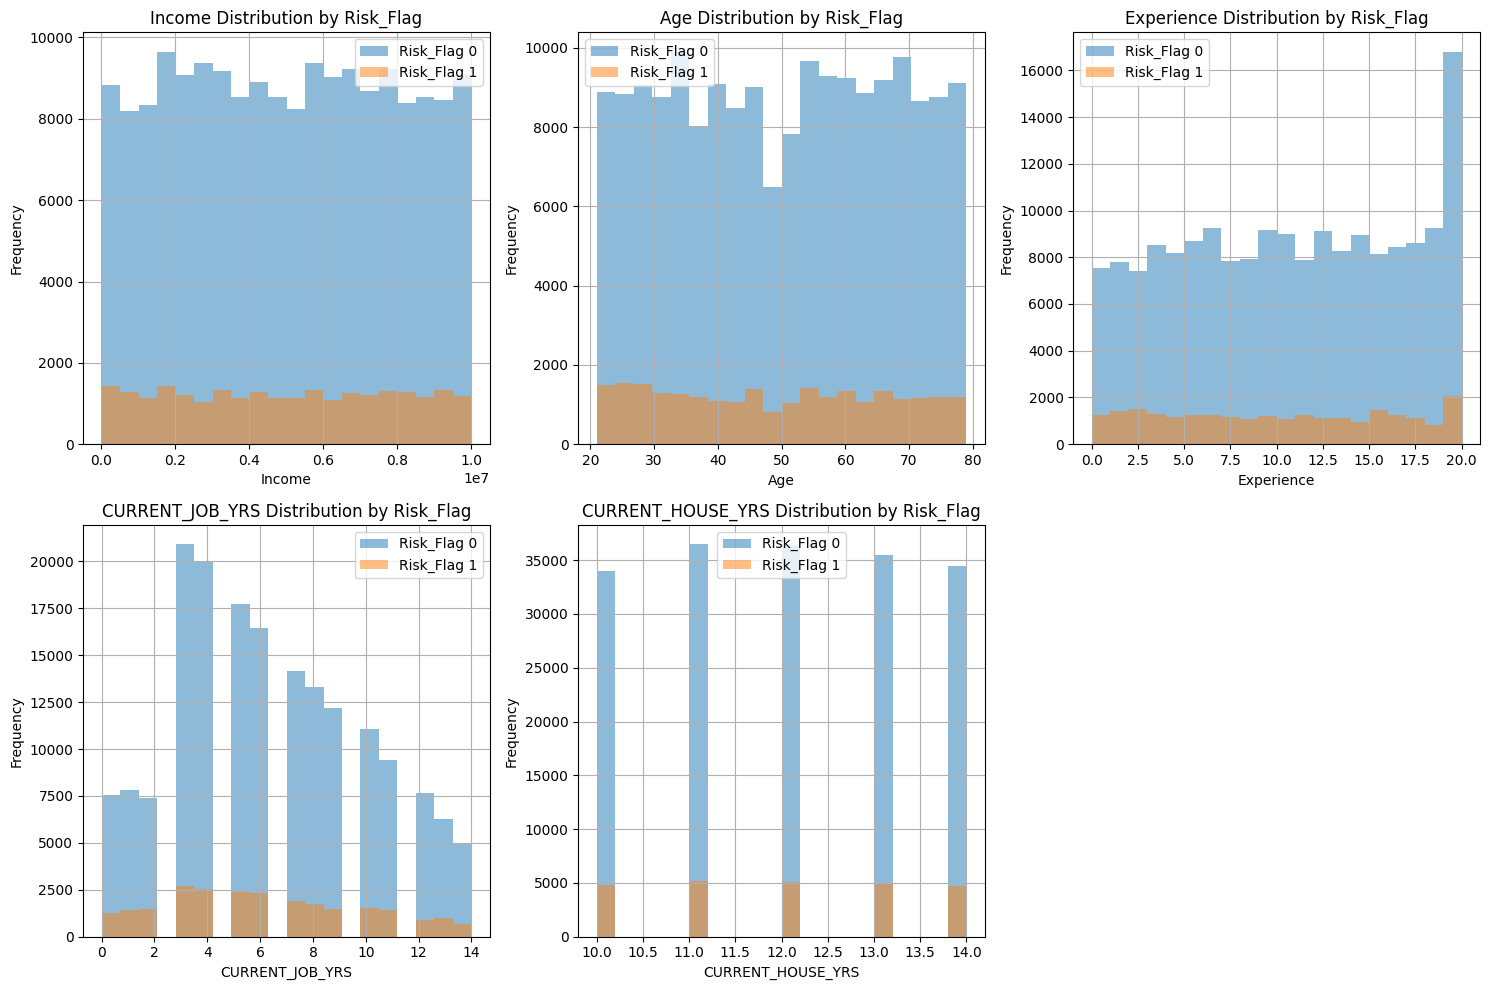

In [15]:
plot_feature_distribution_by_risk_flag(train_df, continuous_features, max_cols=3)

### SIMPLE DASHBOARD FOR ILLUSTRATION

🔍 Dash App Summary
This app visualizes how each continuous feature relates to the Risk_Flag (0 vs 1):

Histogram: Shows value distribution by risk class.

Pie Chart: Shows risk ratio for the lowest 33% of values.

Stats Panel: Displays mean, std, mean difference, and effect size.

In [16]:
!pip install dash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 53.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 11.8 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: Flask
    Found existing installation: Flask 3.1.0
    Uninstalling Flask-3.1.0:
      Successfully uninstalled Flask-3.1.0


In [17]:
import dash
from dash import dcc, html, Input, Output
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import numpy as np
import math  # Imported math module for calculations


# List of continuous features to plot
continuous_features = ['Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS']

# Initialize Dash app
app = dash.Dash(__name__)
app.title = "Feature Distribution by Risk Flag"

app.layout = html.Div([
    html.H1("Feature Risk Analysis Dashboard", style={'textAlign': 'center'}),

    html.Div([
        html.Label("Select Continuous Feature:", style={'fontWeight': 'bold'}),
        dcc.Dropdown(
            id='feature-dropdown',
            options=[{'label': feature, 'value': feature} for feature in continuous_features],
            value=continuous_features[0],
            clearable=False,
            style={'width': '50%', 'marginBottom': '20px'}
        ),
    ], style={'padding': '20px'}),

    html.Div([
        dcc.Graph(id='histogram-graph', style={'width': '48%', 'display': 'inline-block'}),
        dcc.Graph(id='risk-pie-chart', style={'width': '48%', 'display': 'inline-block', 'float': 'right'})
    ]),

    html.Div(id='stats-output', style={'padding': '20px', 'marginTop': '20px'})
])


@app.callback(
    [Output('histogram-graph', 'figure'),
     Output('risk-pie-chart', 'figure'),
     Output('stats-output', 'children')],
    [Input('feature-dropdown', 'value')]
)
def update_graphs(selected_feature):
    # Calculate basic statistics
    feature_data = train_df[selected_feature]
    risk_0_data = train_df[train_df['Risk_Flag'] == 0][selected_feature]
    risk_1_data = train_df[train_df['Risk_Flag'] == 1][selected_feature]

    # Calculate statistics using math functions where appropriate
    stats = {
        'Overall Mean': feature_data.mean(),
        'Overall Std Dev': feature_data.std(),
        'Non-Risk Mean': risk_0_data.mean(),
        'Risk Mean': risk_1_data.mean(),
        'Mean Difference': abs(risk_0_data.mean() - risk_1_data.mean()),
        'Effect Size': (risk_0_data.mean() - risk_1_data.mean()) / math.sqrt(
            (risk_0_data.std()**2 + risk_1_data.std()**2) / 2)
    }

    # Histogram plot with math-based bin sizing
    n_bins = math.ceil(math.log(len(feature_data), 2))  # Sturges' formula
    fig_hist = px.histogram(
        train_df,
        x=selected_feature,
        color='Risk_Flag',
        barmode='overlay',
        nbins=n_bins,
        opacity=0.7,
        color_discrete_map={0: '#1f77b4', 1: '#d62728'},
        labels={'Risk_Flag': 'Risk Flag'},
        marginal='box'
    )
    fig_hist.update_layout(
        title=f'{selected_feature} Distribution by Risk Flag',
        hovermode='x unified'
    )

    # Pie chart with dynamic threshold calculation
    threshold = np.percentile(feature_data, 33)  # Lower third
    filtered_df = train_df[train_df[selected_feature] <= threshold]
    risk_counts = filtered_df['Risk_Flag'].value_counts(normalize=True) * 100

    fig_pie = go.Figure(data=[
        go.Pie(
            labels=[f'No Risk (0)' if i == 0 else f'At Risk (1)' for i in risk_counts.index],
            values=risk_counts.values,
            marker=dict(colors=['#1f77b4', '#d62728']),
            hole=0.4,
            textinfo='percent+label'
        )
    ])
    fig_pie.update_layout(
        title=f'Risk Distribution for {selected_feature} ≤ {threshold:.1f} (Lower 33%)',
        showlegend=False
    )

    # Create stats display
    stats_text = [
        html.H3("Statistical Summary"),
        html.P(f"Overall Mean: {stats['Overall Mean']:.2f}"),
        html.P(f"Overall Standard Deviation: {stats['Overall Std Dev']:.2f}"),
        html.P(f"Non-Risk Mean: {stats['Non-Risk Mean']:.2f}"),
        html.P(f"Risk Mean: {stats['Risk Mean']:.2f}"),
        html.P(f"Mean Difference: {stats['Mean Difference']:.2f}"),
        html.P(f"Effect Size (Cohen's d): {stats['Effect Size']:.2f}"),
        html.P(f"Risk Rate in Lower Third: {risk_counts.get(1, 0):.1f}%")
    ]

    return fig_hist, fig_pie, stats_text


if __name__ == '__main__':
    app.run(debug=True, port=8051)

<IPython.core.display.Javascript object>

### Box-Plot

Box plot comparing various continous features(numerical) with the risk flag

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import math
import matplotlib.patches as mpatches

def plot_feature_distribution_by_risk_flag_boxplot(train_df, features, risk_flag_column='Risk_Flag', max_cols=3, figsize=(15, 5)):
    """
    Plots the distribution of continuous features by risk flag using box plots with:
    - Horizontal grid lines for better readability
    - Muted colors for visual comfort
    - Clear legend
    - Proper subplot arrangement

    Parameters:
    - train_df: DataFrame containing the data
    - features: List of continuous feature columns to plot
    - risk_flag_column: Name of the risk flag column (default 'Risk_Flag')
    - max_cols: Maximum number of plots per row
    - figsize: Base figure size (width, height) for each row
    """
    total_features = len(features)
    num_rows = math.ceil(total_features / max_cols)

    # Create figure with adjusted size
    fig, axes = plt.subplots(num_rows, max_cols, figsize=(figsize[0], figsize[1] * num_rows))
    if num_rows == 1 and max_cols == 1:
        axes = [axes]  # Ensure axes is always iterable
    else:
        axes = axes.flatten()

    # Convert Risk_Flag to string for categorical plotting
    train_df = train_df.copy()
    train_df[risk_flag_column] = train_df[risk_flag_column].astype(str)

    # Define muted color palette
    palette = {"0": '#7293CB', "1": '#E1974C'}  # Muted blue and orange

    # Create legend patches
    legend_patches = [
        mpatches.Patch(color='#7293CB', label='Low Risk (0)'),
        mpatches.Patch(color='#E1974C', label='High Risk (1)')
    ]

    for i, feature in enumerate(features):
        ax = axes[i]

        # Create boxplot with muted colors
        sns.boxplot(
            x=risk_flag_column,
            y=feature,
            data=train_df,
            ax=ax,
            palette=palette,
            width=0.5,  # Slightly narrower boxes for better spacing
            linewidth=1.5  # Slightly thicker lines
        )

        # Add horizontal grid lines
        ax.yaxis.grid(True, linestyle='--', alpha=0.4)
        ax.set_axisbelow(True)  # Ensure grid lines are behind the boxes

        # Customize plot appearance
        ax.set_title(f'{feature} Distribution', pad=12, fontsize=12)
        ax.set_xlabel('Risk Flag', labelpad=10)
        ax.set_ylabel(feature, labelpad=10)

        # Rotate x-axis labels if needed
        plt.setp(ax.get_xticklabels(), rotation=0)

        # Add legend to each subplot
        ax.legend(
            handles=legend_patches,
            title="Risk Level",
            frameon=True,
            framealpha=0.8,
            edgecolor='black'
        )

        # Lighten the borders
        for spine in ax.spines.values():
            spine.set_edgecolor('#d3d3d3')

    # Remove any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout(pad=3.0)
    plt.show()

<ipython-input-18-026d17e2458d>:48: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-18-026d17e2458d>:48: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-18-026d17e2458d>:48: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-18-026d17e2458d>:48: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-18-026d17e2458d>:48: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and wi

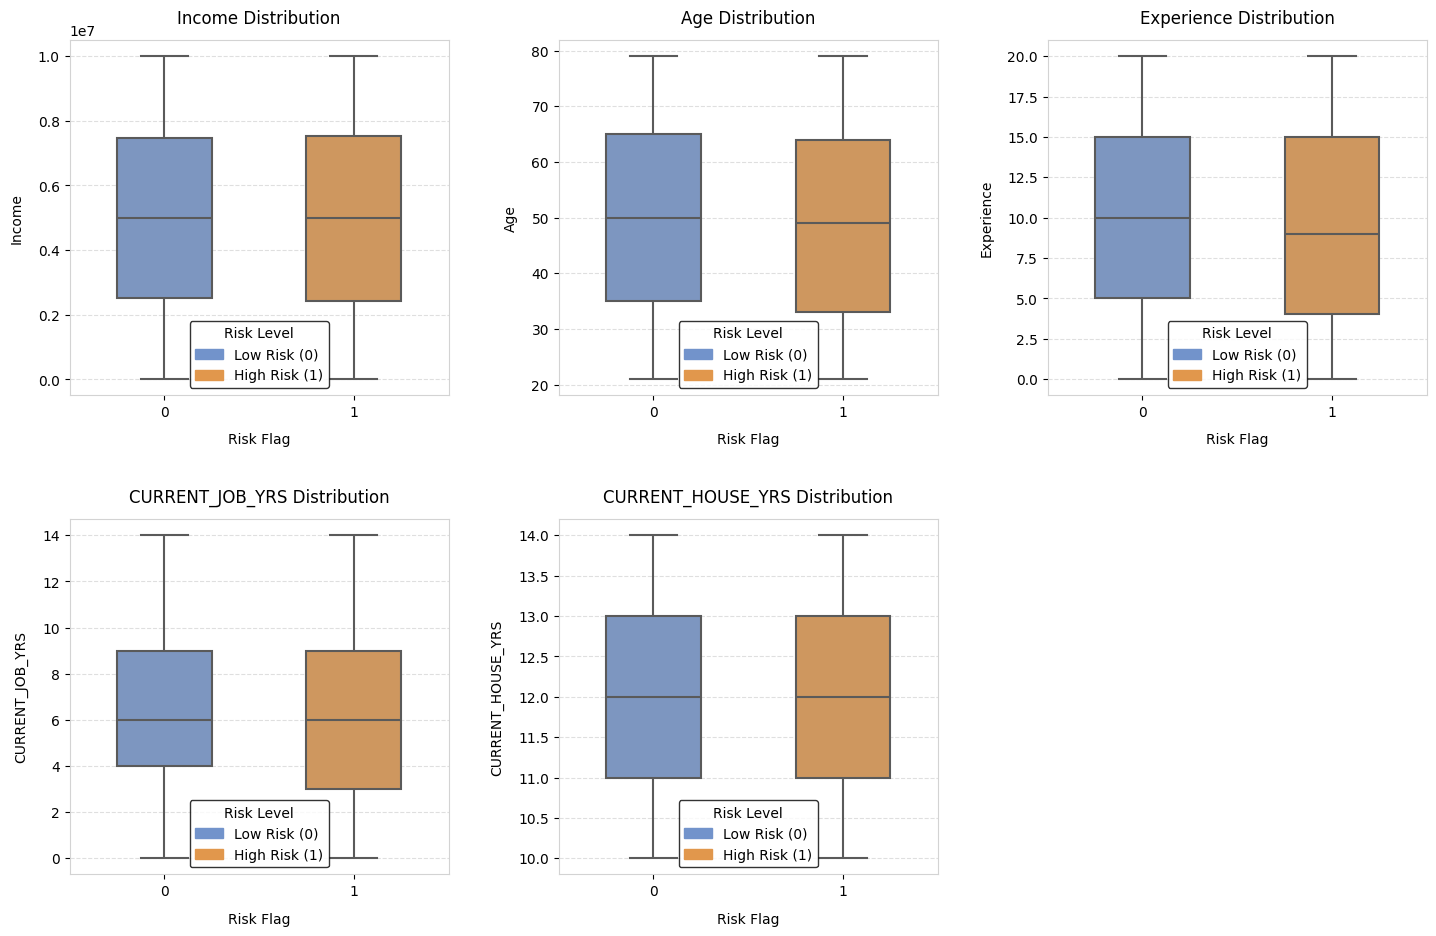

In [19]:
plot_feature_distribution_by_risk_flag_boxplot(train_df, continuous_features, max_cols=3)

### Density Plot

Density Plot, showing the distribution of various continous features (numerical features) vs the risk flag

In [20]:
# Function to plot the distribution of continuous (numeric) features in a dataset,
# split by the values of a binary target variable (e.g., 'Risk_Flag').
# Each feature's distribution is plotted side-by-side using density (KDE) plots,
# and the layout is automatically adjusted to fit multiple rows if there are too many features for one row.

def plot_feature_distribution_by_risk_flag_density(train_df, risk_flag_column='Risk_Flag', max_cols=3, figsize=(15, 5)):
    """
    Plots the distribution of continuous features by risk flag using density plots (KDE),
    arranged in a horizontal layout and split to multiple rows if needed.

    Parameters:
    - train_df: DataFrame containing the data
    - risk_flag_column: Name of the column indicating risk flag
    - max_cols: Maximum number of plots per row
    - figsize: Tuple for each row's figure size (width, height)
    """
    # Select only numeric columns (int or float types)
    continuous_features = train_df.select_dtypes(include=['int64', 'float64']).columns.tolist()

    # Exclude the target (risk flag) column from the list of features to plot
    continuous_features = [f for f in continuous_features if f != risk_flag_column]

    # Determine how many rows of subplots are needed based on number of features and max columns per row
    total_features = len(continuous_features)
    num_rows = math.ceil(total_features / max_cols)

    # Create a grid of subplots based on computed rows and columns
    fig, axes = plt.subplots(num_rows, max_cols, figsize=(figsize[0], figsize[1] * num_rows))
    axes = axes.flatten()  # Flatten the axes array for easy indexing

    # Loop through each feature and plot the KDE plots for both classes of risk_flag
    for i, feature in enumerate(continuous_features):
        ax = axes[i]
        # KDE for class 0
        sns.kdeplot(train_df[train_df[risk_flag_column] == 0][feature], label=f'{risk_flag_column} 0', fill=True, alpha=0.5, ax=ax)
        # KDE for class 1
        sns.kdeplot(train_df[train_df[risk_flag_column] == 1][feature], label=f'{risk_flag_column} 1', fill=True, alpha=0.5, ax=ax)
        # Labeling and legend
        ax.set_title(f'{feature} by {risk_flag_column}')
        ax.set_xlabel(feature)
        ax.set_ylabel('Density')
        ax.legend()

    # Remove any unused subplot axes
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()



# Function to plot the KDE (density) distribution of numerical columns from a dataset,
# using the `hue` parameter to overlay classes of a target column on the same plot.
# This function is structured to work well with multiple subplots in a grid layout.

def plot_numerical_distributions(data, numerical_columns, target_column, nrows=3, ncols=3, figsize=(12, 8)):
    """
    Plots KDE subplots for a list of numerical columns against a target classification variable.

    Parameters:
    - data: DataFrame containing the data.
    - numerical_columns: List of numerical column names to plot.
    - target_column: Column name to use for hue (typically a classification target).
    - nrows: Number of rows in the subplot grid.
    - ncols: Number of columns in the subplot grid.
    - figsize: Tuple for figure size.
    """
    # Create subplot grid
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
    axes = axes.flatten()  # Flatten axes for simple indexing

    # Plot each numerical feature using KDE with hue
    for i, col in enumerate(numerical_columns):
        if col != target_column:
            sns.kdeplot(data=data, x=col, hue=target_column, ax=axes[i], fill=True)
            axes[i].set_title(f'Distribution of {col}')
            axes[i].set_xlabel(col)
            axes[i].set_ylabel('Density')

    # Remove any extra subplot axes not used
    for j in range(len(numerical_columns), len(axes)):
        fig.delaxes(axes[j])

    # Adjust layout
    plt.tight_layout()
    plt.show()


### Normalise for easier comparison

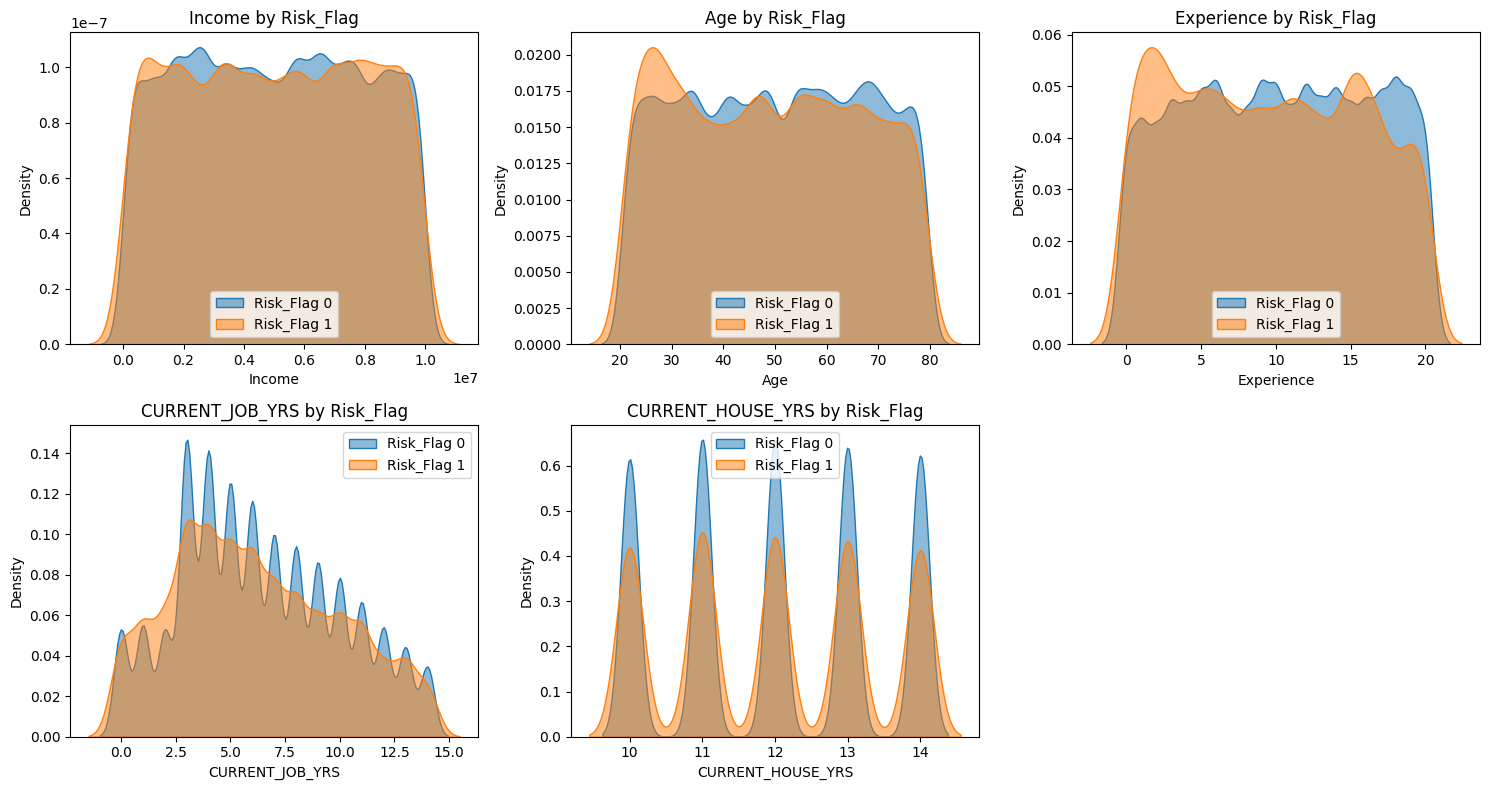

In [21]:
plot_feature_distribution_by_risk_flag_density(train_df, max_cols=3, figsize=(15, 4))

### Distribution shown in raw counts (not normalized)

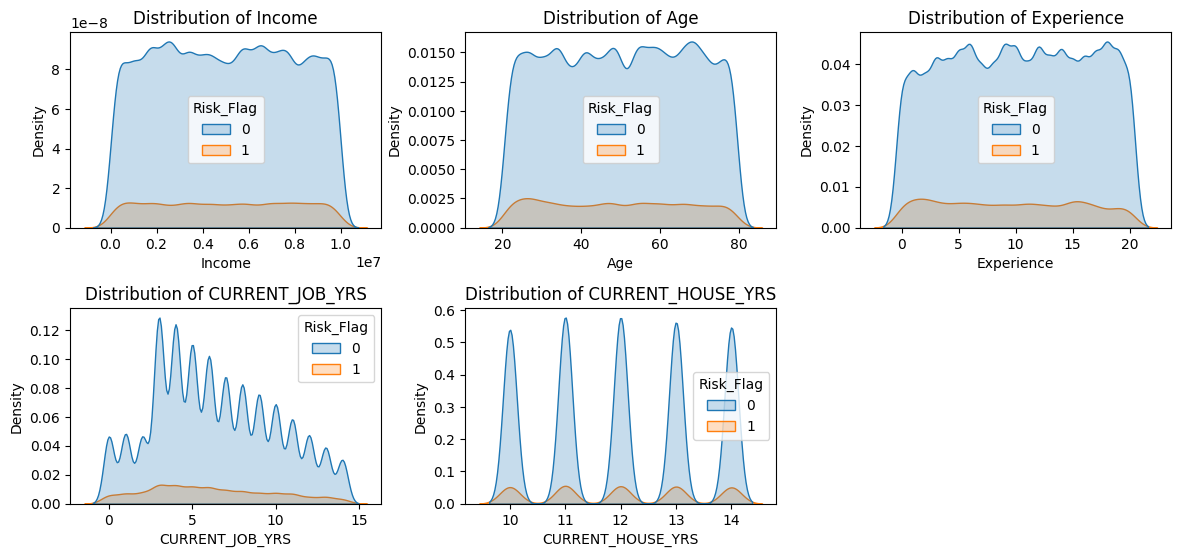

In [22]:
plot_numerical_distributions(data=train_df, numerical_columns=continuous_features, target_column='Risk_Flag')

### Scatter Plot

Showing Various Numerical Values vs The Risk Flag

In [23]:
def plot_feature_distribution_by_risk_flag_scatter(train_df, risk_flag_column='Risk_Flag', max_cols=3, figsize=(15, 5)):
    """
    Plots scatter plots of continuous features against the risk flag,
    arranged in a horizontal layout and split to multiple rows if needed.

    Parameters:
    - train_df: DataFrame containing the data
    - risk_flag_column: Name of the column indicating risk flag (default is 'Risk_Flag')
    - max_cols: Maximum number of plots per row
    - figsize: Tuple for each row's figure size (width, height)
    """
    # Get continuous numeric features excluding the risk flag
    continuous_features = train_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    continuous_features = [f for f in continuous_features if f != risk_flag_column]

    total_features = len(continuous_features)
    num_rows = math.ceil(total_features / max_cols)

    fig, axes = plt.subplots(num_rows, max_cols, figsize=(figsize[0], figsize[1] * num_rows))
    axes = axes.flatten()

    for i, feature in enumerate(continuous_features):
        ax = axes[i]
        sns.scatterplot(x=train_df[risk_flag_column], y=train_df[feature], alpha=0.5, ax=ax)
        ax.set_title(f'{feature} vs {risk_flag_column}')
        ax.set_xlabel(risk_flag_column)
        ax.set_ylabel(feature)

    # Remove unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


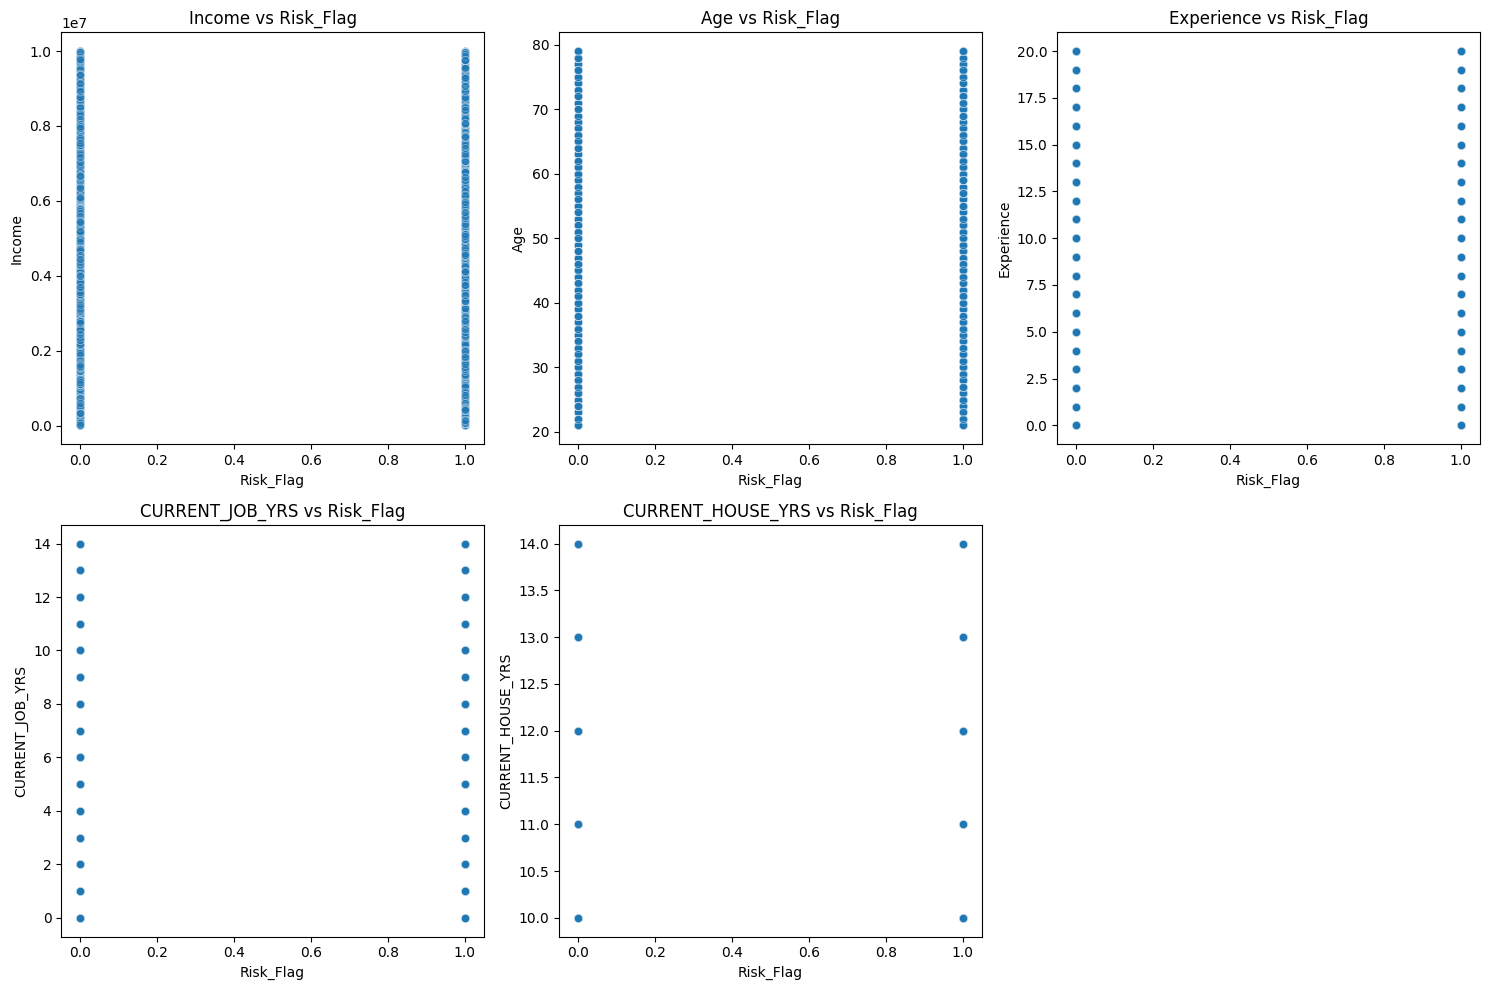

In [24]:
plot_feature_distribution_by_risk_flag_scatter(train_df, max_cols=3)

### BarChart

Representing the Top Categories and their count for convenience

Showing Various Numerical Values vs The Risk Flag

In [25]:
def plot_categorical_distribution(data, categorical_columns, max_cols=3, figsize=(16, 8)):
    """
    Plots count distributions of categorical features, showing top categories, arranged in subplots.

    Parameters:
    - data: DataFrame containing the data
    - categorical_columns: List of categorical column names to plot
    - max_cols: Maximum number of plots per row
    - figsize: Tuple for the overall figure size (width, height)
    """
    total_features = len(categorical_columns)
    num_rows = (total_features // max_cols) + (total_features % max_cols > 0)  # Calculate number of rows

    fig, axes = plt.subplots(num_rows, max_cols, figsize=(figsize[0], figsize[1] * num_rows))
    axes = axes.flatten()

    # Define a color palette (e.g., a set of distinct colors for each category)
    colors = sns.color_palette("Set2", n_colors=10)  # You can adjust this palette as needed

    for i, col in enumerate(categorical_columns):
        if i >= len(axes):  # Ensure we don't exceed the number of subplots
            break

        # Get top 10 categories in the column
        top_10_categories = data[col].value_counts().nlargest(10).index

        # Create a countplot for the top 10 categories with different colors
        sns.countplot(data=data[data[col].isin(top_10_categories)],
                      x=col, order=top_10_categories, ax=axes[i], palette=colors)

        axes[i].set_title(f'Distribution of {col} (Top Categories)')
        axes[i].set_xticks(range(len(top_10_categories)))  # Set the ticks to match the categories
        axes[i].set_xticklabels(top_10_categories, rotation=45)  # Set labels after ticks

    # Remove unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


<ipython-input-25-ac82ce4f734b>:28: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-25-ac82ce4f734b>:28: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-25-ac82ce4f734b>:28: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-25-ac82ce4f734b>:28: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-25-ac82ce4f734b>:28: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and wi

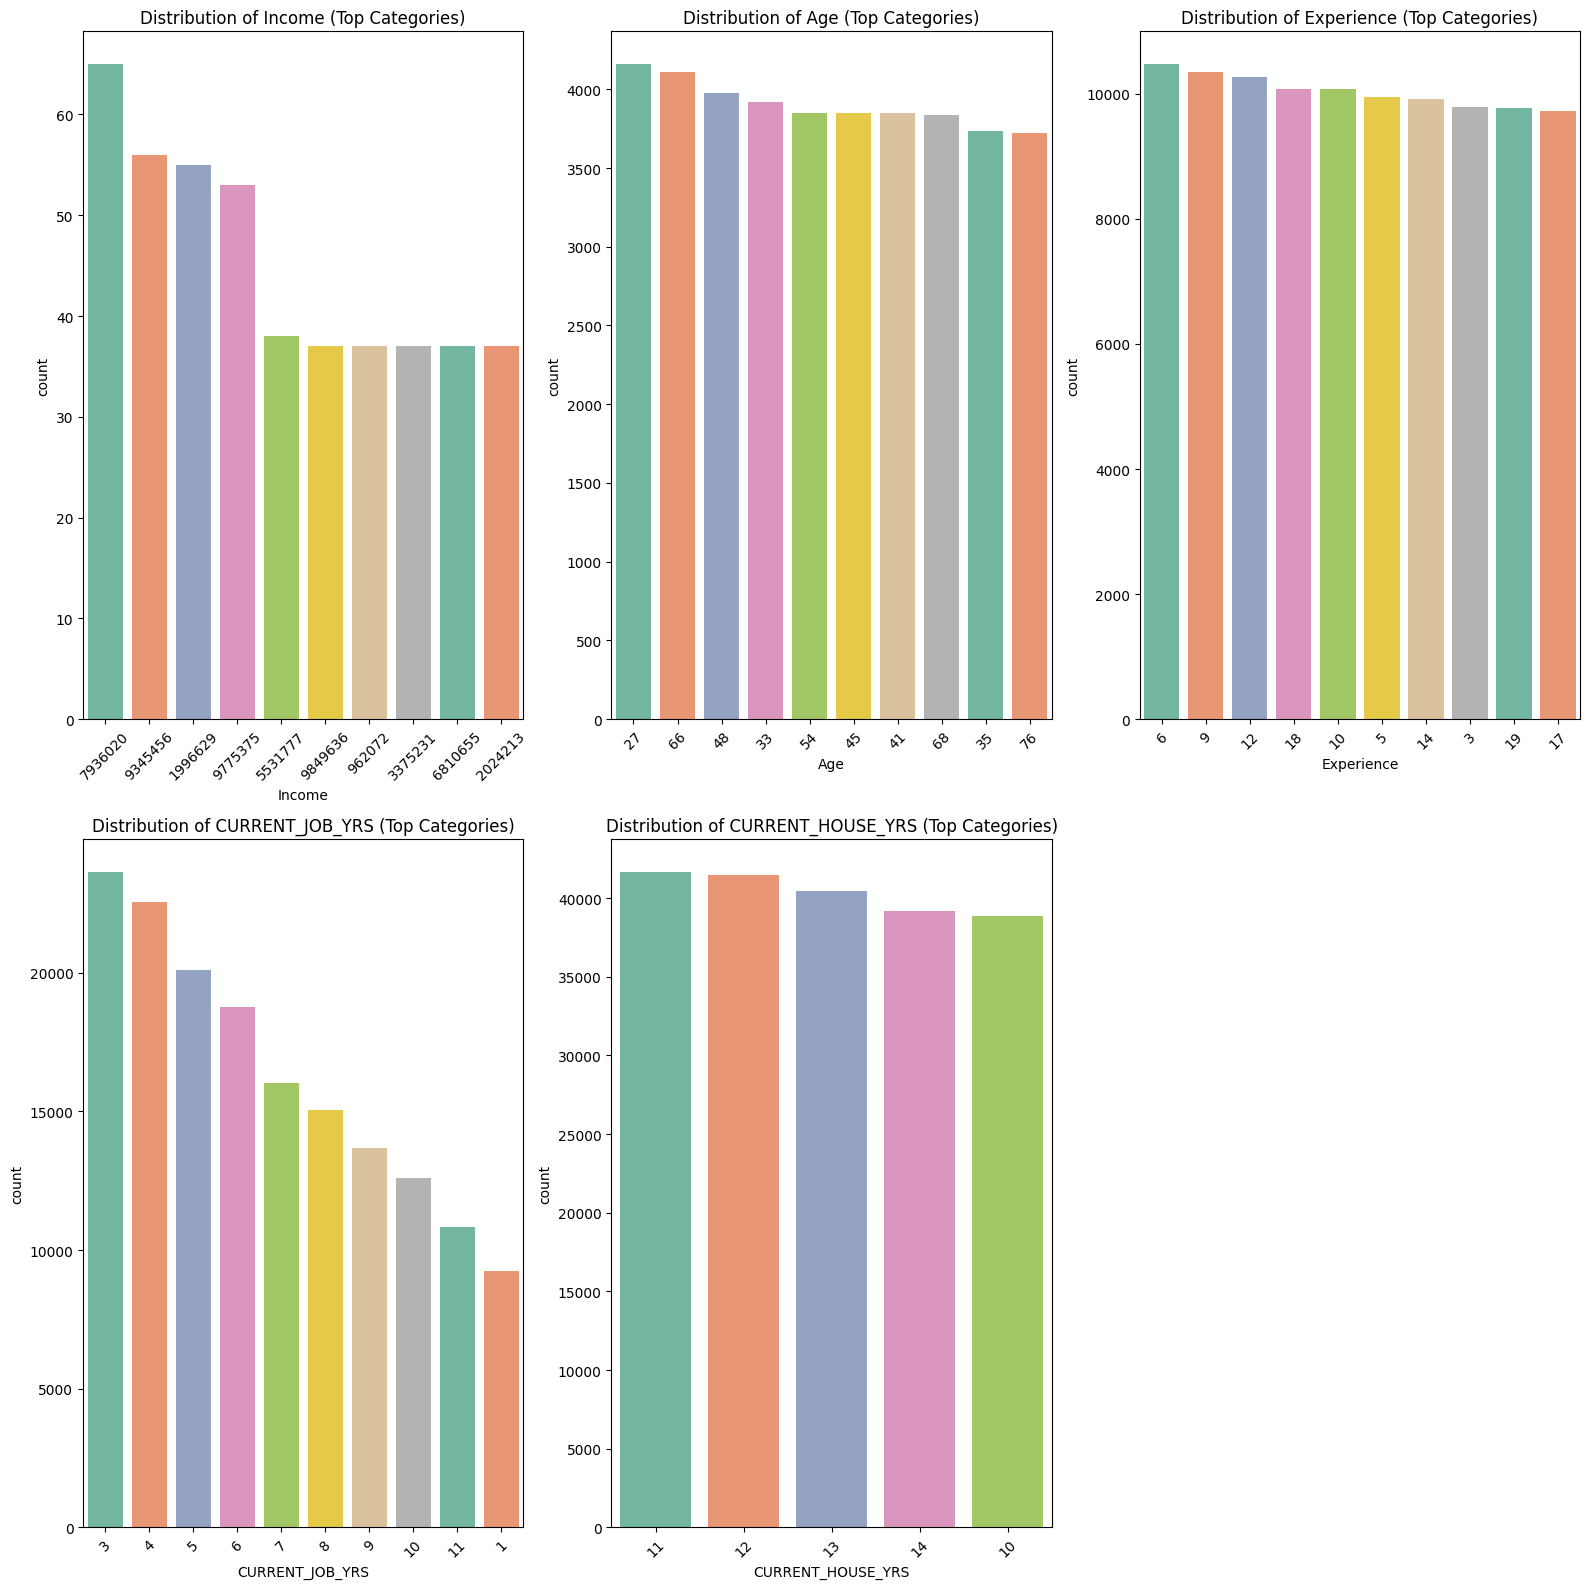

In [26]:
plot_categorical_distribution(train_df, continuous_features, max_cols=3)

## For Categorical Features

### Getting Categorical Features

In [27]:
categorical_columns = train_df.select_dtypes(include=['object', 'category']).columns
categorical_df = train_df[categorical_columns]

In [28]:
categorical_df

,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE
0,single,rented,no,Secretary,Bilaspur,Chhattisgarh
1,single,rented,no,Librarian,Amritsar,Punjab
2,single,rented,no,Artist,Farrukhabad,Uttar_Pradesh
3,single,rented,no,Chef,Mysore[7][8][9],Karnataka
4,single,rented,yes,Technical_writer,Bareilly,Uttar_Pradesh
...,...,...,...,...,...,...
201595,single,rented,no,Civil_engineer,Thane,Maharashtra
201596,single,rented,no,Web_designer,Sambhal,Uttar_Pradesh
201597,single,rented,no,Dentist,Kurnool[18],Andhra_Pradesh
201598,single,rented,no,Computer_operator,South_Dumdum,West_Bengal


### Printing All Unique Items In Categorical Column

In [29]:
def print_unique_categorical_values(df):
    """
    Prints unique values and their count for each categorical column in the DataFrame.

    Parameters:
    - df: DataFrame containing the data.
    """
    # Select categorical columns (those with object or category data types)
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns

    # Print unique values and their count for each categorical column
    for col in categorical_columns:
        print(f"Unique values in '{col}':")

        # Get the unique values and their counts
        value_counts = df[col].value_counts()

        # Print unique values and their counts
        print(value_counts)
        print()  # For better readability

# Call the function to print unique values and counts for categorical columns
print_unique_categorical_values(train_df)


Unique values in 'Married/Single':
Married/Single
single     181036
married     20564
Name: count, dtype: int64

Unique values in 'House_Ownership':
House_Ownership
rented          185621
owned            10252
norent_noown      5727
Name: count, dtype: int64

Unique values in 'Car_Ownership':
Car_Ownership
no     140877
yes     60723
Name: count, dtype: int64

Unique values in 'Profession':
Profession
Physician                     4771
Statistician                  4660
Drafter                       4358
Web_designer                  4335
Computer_hardware_engineer    4306
Psychologist                  4292
Industrial_Engineer           4227
Fashion_Designer              4220
Magistrate                    4217
Air_traffic_controller        4195
Comedian                      4189
Mechanical_engineer           4187
Chemical_engineer             4183
Hotel_Manager                 4162
Technical_writer              4157
Financial_Analyst             4129
Biomedical_Engineer           4121

### Barchart

Showing Various Categorical Features vs The Risk Flag

In [30]:
def plot_risk_by_category(train_df, category_column, figsize=(12, 6), rotation=45,
                         top_n=None, horizontal=False, normalize=False):
    """
    Plots the distribution of Risk_Flag across categories of a given column.
    Uses red for Risk_Flag=1 (At Risk) and blue for Risk_Flag=0 (No Risk).
    No numbers are displayed on the bars.

    Parameters:
    - train_df: DataFrame containing the data
    - category_column: Name of the categorical column to analyze
    - figsize: Size of the figure (width, height)
    - rotation: Rotation angle for x-axis labels
    - top_n: If specified, only plot the top N most frequent categories
    - horizontal: If True, plot horizontal bars instead of vertical
    - normalize: If True, shows percentages instead of counts
    """
    # Prepare data
    if top_n is not None:
        top_categories = train_df[category_column].value_counts().nlargest(top_n).index
        filtered_df = train_df[train_df[category_column].isin(top_categories)]
    else:
        filtered_df = train_df.copy()

    # Create cross-tabulation
    cross_tab = pd.crosstab(filtered_df[category_column], filtered_df['Risk_Flag'])

    if normalize:
        cross_tab = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100

    # Sort by total count if not normalized, or by risk percentage if normalized
    if not normalize:
        cross_tab = cross_tab.loc[cross_tab.sum(axis=1).sort_values(ascending=False).index]
    else:
        cross_tab = cross_tab.loc[(cross_tab[1]/cross_tab.sum(axis=1)).sort_values(ascending=False).index]

    # Create plot with custom colors (blue for 0, red for 1)
    plt.figure(figsize=figsize)
    colors = ['#1f77b4', '#d62728']  # Blue for No Risk, Red for At Risk

    if horizontal:
        ax = cross_tab.plot(kind='barh', stacked=True,
                           color=colors,
                           edgecolor='black')
        plt.xlabel('Percentage' if normalize else 'Count')
        plt.ylabel(category_column)
    else:
        ax = cross_tab.plot(kind='bar', stacked=True,
                           color=colors,
                           edgecolor='black')
        plt.ylabel('Percentage' if normalize else 'Count')
        plt.xlabel(category_column)
        plt.xticks(rotation=rotation)

    # Customize legend
    plt.legend(title='Risk Flag', labels=['No Risk', 'At Risk'],
               bbox_to_anchor=(1.05, 1), loc='upper left')

    title = f'Risk Distribution by {category_column}'
    if normalize:
        title += ' (Percentage)'
    if top_n:
        title += f' (Top {top_n} Categories)'
    plt.title(title)

    plt.tight_layout()
    plt.show()

<Figure size 1200x600 with 0 Axes>

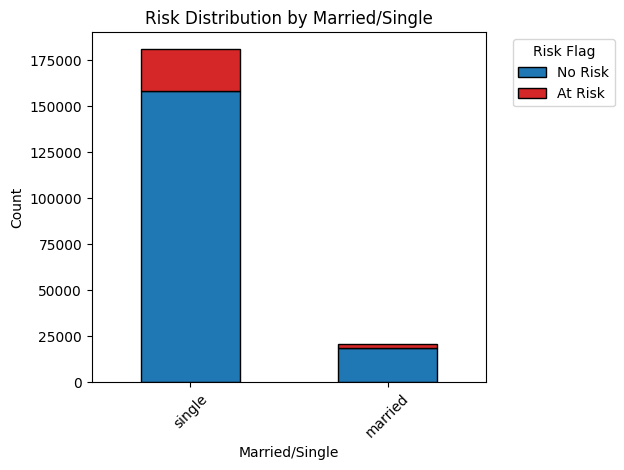

<Figure size 1200x600 with 0 Axes>

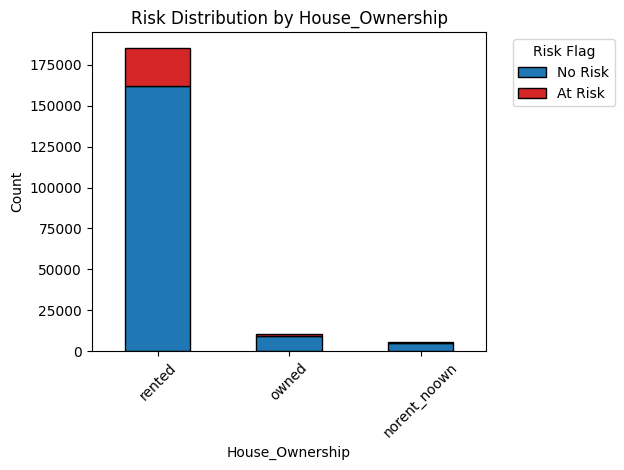

<Figure size 1400x800 with 0 Axes>

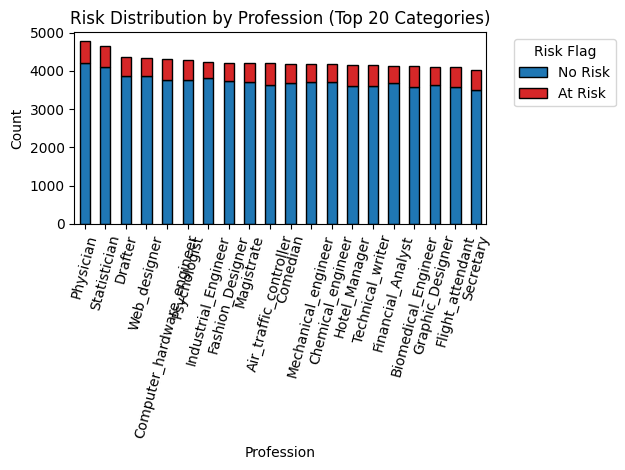

<Figure size 1200x1600 with 0 Axes>

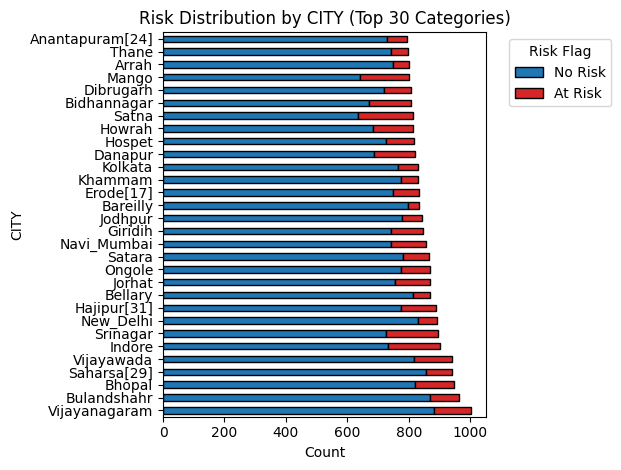

<Figure size 1200x600 with 0 Axes>

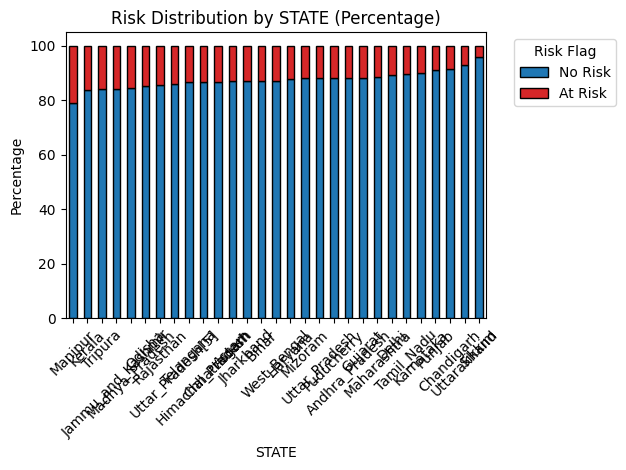

In [31]:
# Binary categories
plot_risk_by_category(train_df, 'Married/Single')
plot_risk_by_category(train_df, 'House_Ownership')

# Profession (top 20)
plot_risk_by_category(train_df, 'Profession', figsize=(14, 8), rotation=75, top_n=20)

# City (horizontal plot showing top 30)
plot_risk_by_category(train_df, 'CITY', figsize=(12, 16), horizontal=True, top_n=30)

# State (normalized percentage view)
plot_risk_by_category(train_df, 'STATE', figsize=(12, 6), rotation=45, normalize=True)

### Dashboard

Showing Various Categorical Features vs The Risk Flag

In [32]:
import pandas as pd
import dash
from dash import dcc, html, Input, Output
import plotly.express as px

def create_risk_plot(train_df, category_column, top_n=None, normalize=False, horizontal=False):
    # Prepare data
    if top_n:
        top_categories = train_df[category_column].value_counts().nlargest(top_n).index
        df = train_df[train_df[category_column].isin(top_categories)]
    else:
        df = train_df.copy()

    # Cross-tabulation
    cross_tab = pd.crosstab(df[category_column], df['Risk_Flag'])

    if normalize:
        cross_tab = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100
        y_title = 'Percentage'
    else:
        y_title = 'Count'

    cross_tab = cross_tab.reset_index().melt(id_vars=category_column, value_name=y_title, var_name='Risk_Flag')

    # Plotly bar chart
    fig = px.bar(
        cross_tab,
        x=y_title if horizontal else category_column,
        y=category_column if horizontal else y_title,
        color='Risk_Flag',
        color_discrete_map={0: '#1f77b4', 1: '#d62728'},
        barmode='stack',
        orientation='h' if horizontal else 'v',
        labels={'Risk_Flag': 'Risk Flag', category_column: category_column}
    )

    fig.update_layout(
        title=f"Risk Distribution by {category_column}" + (" (Percentage)" if normalize else ""),
        legend_title="Risk Flag",
        margin=dict(t=50, r=20, l=20, b=40)
    )

    return fig

# Initialize the Dash app with your original data
app = dash.Dash(__name__)

# UI Enhancements (keeping your original data and parameters)
app.layout = html.Div([
    html.Div([
        html.H2("Risk Distribution Dashboard",
               style={'color': '#2c3e50', 'marginBottom': '20px'}),

        html.Div([
            html.Div([
                html.Label("Select Categorical Column",
                         style={'fontWeight': 'bold', 'marginBottom': '5px'}),
                dcc.Dropdown(
                    id='category-dropdown',
                    options=[{'label': col, 'value': col} for col in categorical_columns],
                    value=categorical_columns[0],
                    style={'width': '100%'}
                )
            ], style={'width': '48%', 'display': 'inline-block'}),

            html.Div([
                html.Label("Top N Categories",
                          style={'fontWeight': 'bold', 'marginBottom': '5px'}),
                dcc.Slider(
                    id='top-n-slider',
                    min=2,
                    max=20,
                    step=1,
                    value=10,
                    marks={i: str(i) for i in range(2, 21, 2)},
                    tooltip={'placement': 'bottom', 'always_visible': True}
                )
            ], style={'width': '48%', 'float': 'right', 'paddingLeft': '20px'}),
        ], style={'marginBottom': '30px'}),

        html.Div([
            dcc.Checklist(
                id='options-checklist',
                options=[
                    {'label': ' Normalize (Percentage)', 'value': 'normalize'},
                    {'label': ' Horizontal Bars', 'value': 'horizontal'}
                ],
                value=[],
                labelStyle={'display': 'inline-block', 'marginRight': '20px'}
            )
        ], style={'marginBottom': '20px'}),

        dcc.Graph(
            id='risk-bar-chart',
            style={
                'border': '1px solid #eee',
                'borderRadius': '5px',
                'padding': '10px',
                'boxShadow': '0 2px 5px rgba(0,0,0,0.1)'
            }
        )
    ], style={
        'maxWidth': '1200px',
        'margin': '0 auto',
        'padding': '20px',
        'backgroundColor': 'white',
        'borderRadius': '8px',
        'boxShadow': '0 4px 10px rgba(0,0,0,0.1)'
    })
], style={
    'backgroundColor': '#f8f9fa',
    'padding': '40px',
    'fontFamily': 'Arial, sans-serif'
})

# Your original callback unchanged
@app.callback(
    Output('risk-bar-chart', 'figure'),
    Input('category-dropdown', 'value'),
    Input('top-n-slider', 'value'),
    Input('options-checklist', 'value')
)
def update_plot(category_column, top_n, options):
    normalize = 'normalize' in options
    horizontal = 'horizontal' in options
    return create_risk_plot(train_df, category_column, top_n, normalize, horizontal)

if __name__ == '__main__':
    app.run(debug=True)

<IPython.core.display.Javascript object>

### Stacked Bar Plot

In [33]:
def plot_risk_distribution(data, category_column, top_n=None, normalize=False,
                         figsize=None, rotation=None, horizontal=False):
    """
    Universal function to plot any categorical variable against Risk_Flag
    with intelligent automatic formatting.

    Parameters:
    - data: DataFrame containing your data
    - category_column: Column to plot against Risk_Flag
    - top_n: Show only top N categories (default shows all)
    - normalize: Show percentages instead of counts
    - figsize: Custom figure size (automatic if None)
    - rotation: Custom x-axis label rotation (automatic if None)
    - horizontal: Use horizontal bars (default vertical for <15 cats)
    """
    # Prepare data
    if top_n:
        top_cats = data[category_column].value_counts().nlargest(top_n).index
        plot_data = data[data[category_column].isin(top_cats)]
    else:
        plot_data = data.copy()

    # Create cross-tab
    cross_tab = pd.crosstab(plot_data[category_column], plot_data['Risk_Flag'])

    # Normalize if requested
    if normalize:
        cross_tab = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100

    # Sort by total count (or by risk percentage if normalized)
    sort_by = cross_tab.sum(axis=1) if not normalize else cross_tab[1]/cross_tab.sum(axis=1)
    cross_tab = cross_tab.loc[sort_by.sort_values(ascending=False).index]

    # Set smart defaults if not specified
    n_categories = len(cross_tab)
    if figsize is None:
        if horizontal:
            figsize = (12, min(6 + n_categories * 0.5, 30))  # Dynamic height
        else:
            figsize = (min(6 + n_categories * 0.3, 20), 8)

    if rotation is None:
        rotation = 45 if n_categories > 5 else 0
        if n_categories > 15:
            rotation = 90

    # Determine orientation
    if horizontal is None:
        horizontal = n_categories > 15

    # Create plot
    plt.figure(figsize=figsize)
    colors = ['#1f77b4', '#d62728']  # Blue=0, Red=1

    if horizontal:
        ax = cross_tab.plot(kind='barh', stacked=True, color=colors, width=0.8)
        plt.xlabel('Percentage' if normalize else 'Count')
        plt.ylabel(category_column)
    else:
        ax = cross_tab.plot(kind='bar', stacked=True, color=colors, width=0.8)
        plt.ylabel('Percentage' if normalize else 'Count')
        plt.xlabel(category_column)
        plt.xticks(rotation=rotation, ha='right' if rotation > 0 else 'center')

    # Add percentage labels if normalized
    if normalize:
        for container in ax.containers:
            ax.bar_label(container, fmt='%.1f%%', label_type='center',
                        color='white', fontweight='bold')

    # Formatting
    plt.title(f'Risk Distribution by {category_column}' +
             (' (Normalized)' if normalize else '') +
             (f' (Top {top_n})' if top_n else ''))
    plt.legend(['No Risk', 'At Risk'], title='Risk Flag',
               bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

<Figure size 660x800 with 0 Axes>

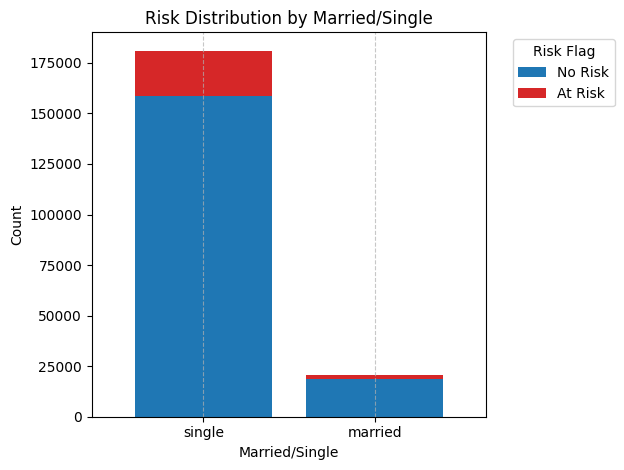

<Figure size 690x800 with 0 Axes>

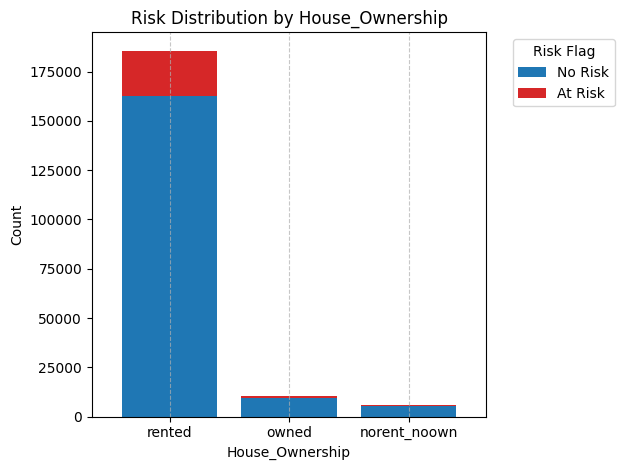

<Figure size 660x800 with 0 Axes>

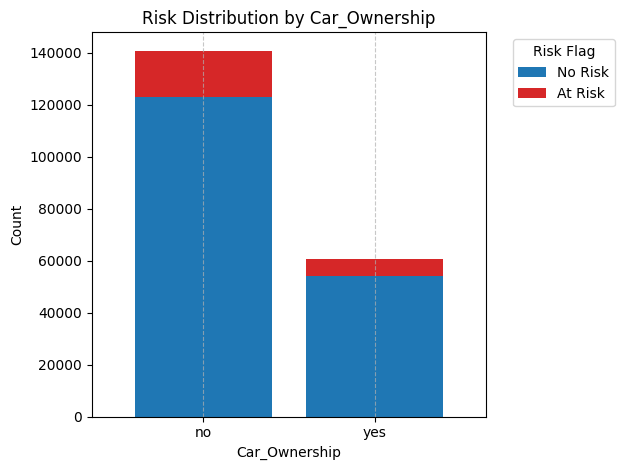

<Figure size 1200x800 with 0 Axes>

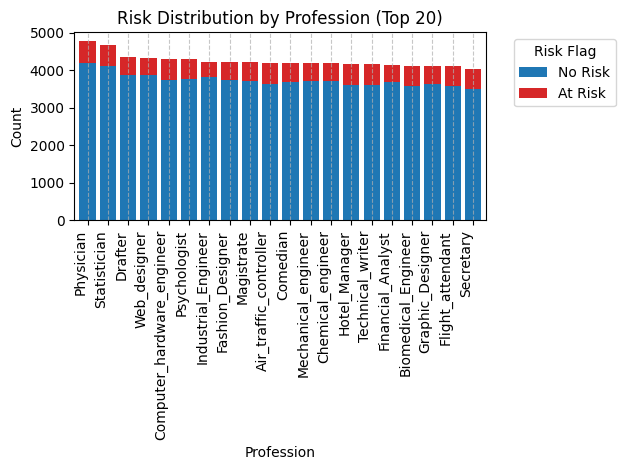

<Figure size 1470x800 with 0 Axes>

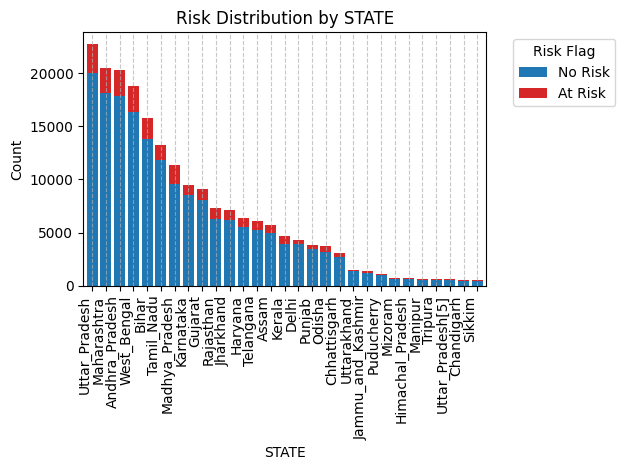

<Figure size 1500x800 with 0 Axes>

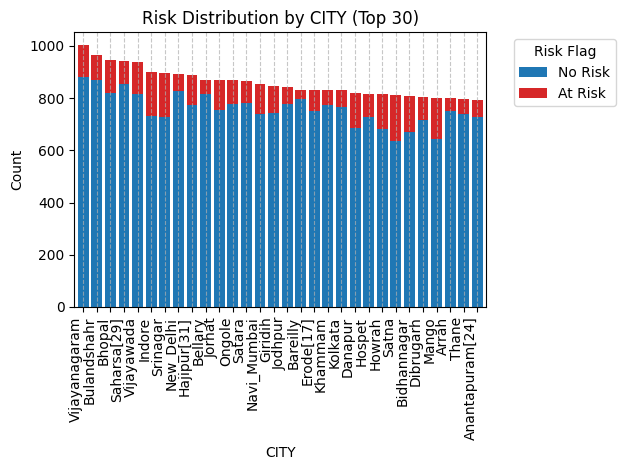

<Figure size 690x800 with 0 Axes>

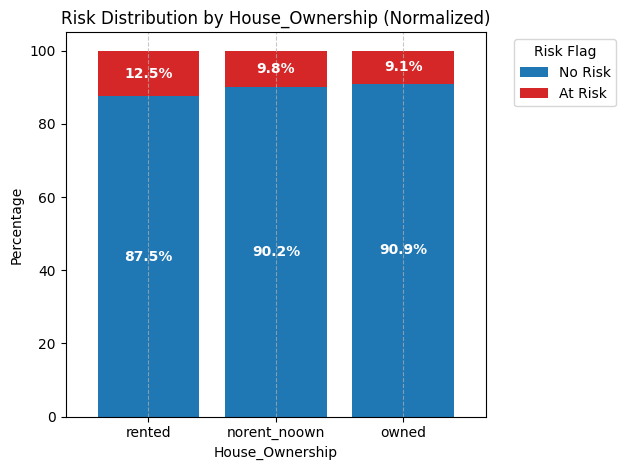

<Figure size 660x800 with 0 Axes>

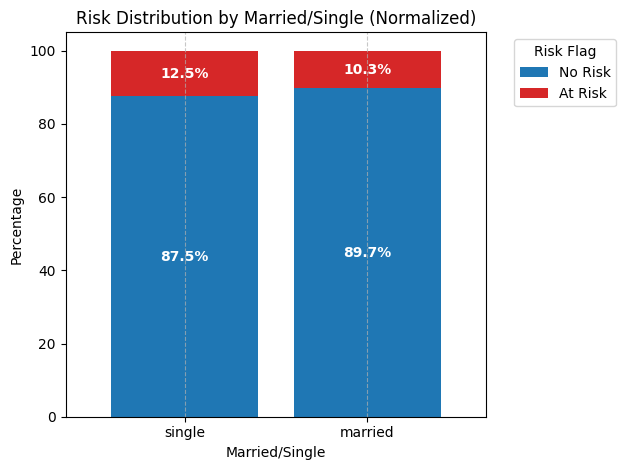

<Figure size 1200x1350 with 0 Axes>

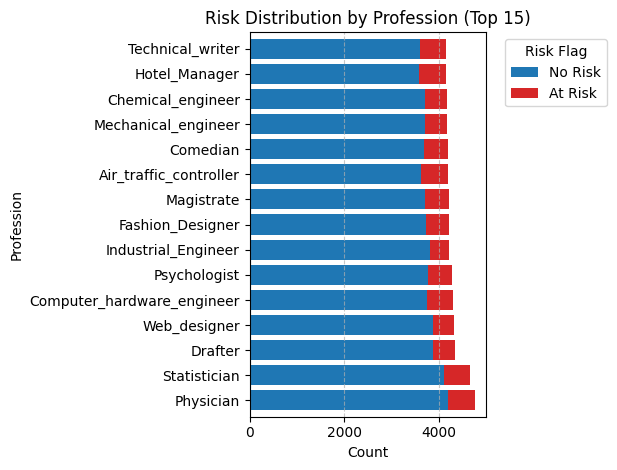

<Figure size 1000x500 with 0 Axes>

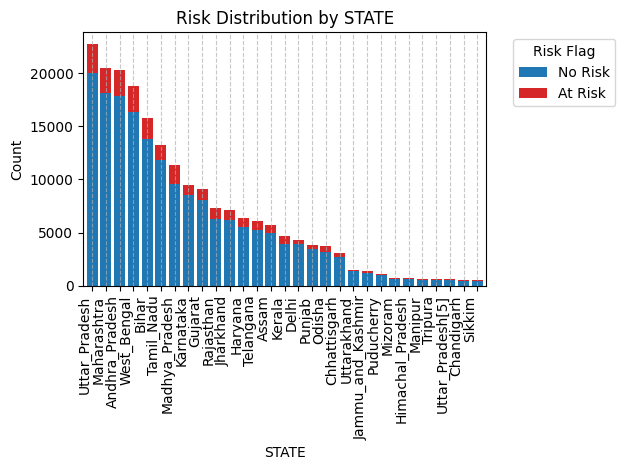

In [34]:
# 1. Binary categories (automatic formatting)
plot_risk_distribution(train_df, 'Married/Single')
plot_risk_distribution(train_df, 'House_Ownership')
plot_risk_distribution(train_df, 'Car_Ownership')

# 2. Profession (auto horizontal for many categories)
plot_risk_distribution(train_df, 'Profession', top_n=20)

# 3. STATE (vertical by default)
plot_risk_distribution(train_df, 'STATE')

# 4. CITY (top 30, auto horizontal)
plot_risk_distribution(train_df, 'CITY', top_n=30)

# 5. Normalized views
plot_risk_distribution(train_df, 'House_Ownership', normalize=True)
plot_risk_distribution(train_df, 'Married/Single', normalize=True)

# 6. Force horizontal for any variable
plot_risk_distribution(train_df, 'Profession', top_n=15, horizontal=True)

# 7. Custom figure size
plot_risk_distribution(train_df, 'STATE', figsize=(10, 5))

### Count Plot

In [35]:
def plot_risk_counts(data, category_column, top_n=None,
                     figsize=None, rotation=None, horizontal=None,
                     show_percentage=False):
    """
    Creates count plots for categorical variables vs Risk_Flag,
    with optional percentage labels inside the bars.
    """
    if 'Risk_Flag' not in data.columns:
        raise ValueError("DataFrame must contain 'Risk_Flag' column")

    if top_n:
        top_cats = data[category_column].value_counts().nlargest(top_n).index
        plot_data = data[data[category_column].isin(top_cats)].copy()
    else:
        plot_data = data.copy()

    if plot_data.empty:
        raise ValueError(f"No data available for {category_column} with given filters")

    n_categories = plot_data[category_column].nunique()
    if figsize is None:
        if horizontal or (horizontal is None and n_categories > 8):
            figsize = (10, max(6, n_categories * 0.5))
        else:
            figsize = (max(8, n_categories * 0.7), 6)

    if rotation is None:
        rotation = 45 if n_categories > 5 else 0
        if n_categories > 15:
            rotation = 90

    if horizontal is None:
        horizontal = n_categories > 8

    plt.figure(figsize=figsize)
    order = plot_data[category_column].value_counts().index

    try:
        if horizontal:
            ax = sns.countplot(data=plot_data, y=category_column, hue='Risk_Flag',
                               palette=['#1f77b4', '#d62728'], order=order)
            plt.xlabel('Count')
        else:
            ax = sns.countplot(data=plot_data, x=category_column, hue='Risk_Flag',
                               palette=['#1f77b4', '#d62728'], order=order)
            plt.ylabel('Count')
            plt.xticks(rotation=rotation, ha='right' if rotation > 0 else 'center')
    except Exception as e:
        raise ValueError(f"Error creating plot for {category_column}: {str(e)}")

    if show_percentage:
        try:
            # Get grouped counts by category and risk flag
            grouped = plot_data.groupby([category_column, 'Risk_Flag']).size().unstack(fill_value=0)
            totals = grouped.sum(axis=1)

            for p in ax.patches:
                value = p.get_height() if not horizontal else p.get_width()
                if value <= 0:
                    continue

                # Extract category and risk flag from bar
                category = p.get_y() if horizontal else p.get_x()
                risk_flag = int(p.get_label()) if p.get_label().isdigit() else None

                # Get corresponding percentage
                cat_label = p.get_y() if horizontal else p.get_x()
                idx = int(cat_label) if isinstance(cat_label, (int, float)) else None
                cat_name = order[idx] if idx is not None and idx < len(order) else None
                if cat_name is None or cat_name not in grouped.index:
                    continue

                rf = 0 if p.get_facecolor() == (31/255, 119/255, 180/255, 1.0) else 1  # blue or red
                count = grouped.loc[cat_name, rf]
                percent = 100 * count / totals[cat_name]

                label = f'{percent:.1f}%'
                if horizontal:
                    x = p.get_x() + value * 0.5
                    y = p.get_y() + p.get_height() / 2
                    ax.text(x, y, label, ha='center', va='center', color='white' if value > 20 else 'black')
                else:
                    x = p.get_x() + p.get_width() / 2
                    y = p.get_y() + value * 0.5
                    ax.text(x, y, label, ha='center', va='center', color='white' if value > 20 else 'black')
        except Exception as e:
            print(f"Could not add percentage labels: {str(e)}")

    plt.title(f'Risk Counts by {category_column}' + (f' (Top {top_n})' if top_n else ''))
    plt.legend(title='Risk Flag', labels=['No Risk', 'At Risk'])
    plt.grid(axis='x' if horizontal else 'y', linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()


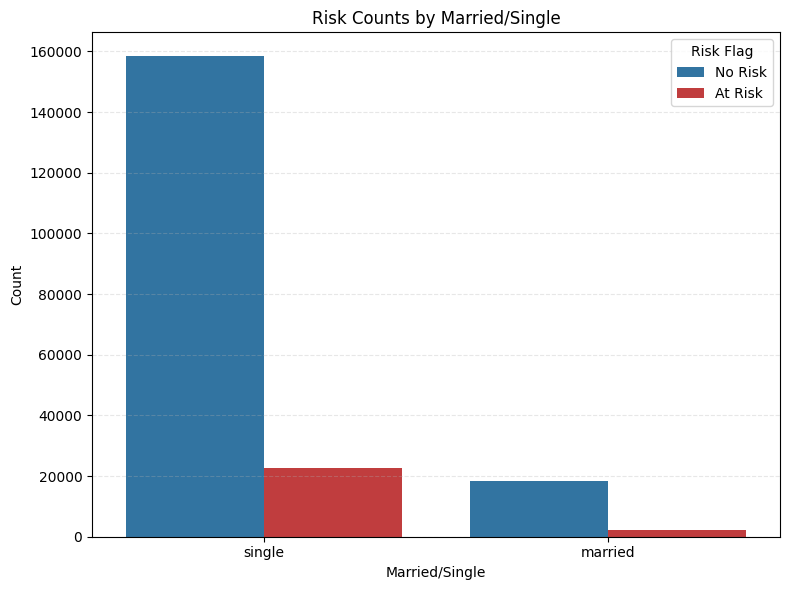

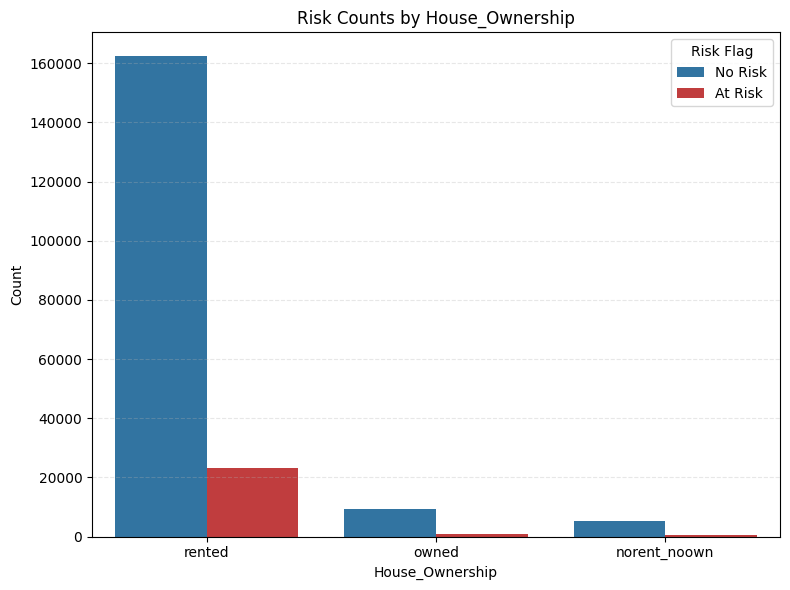

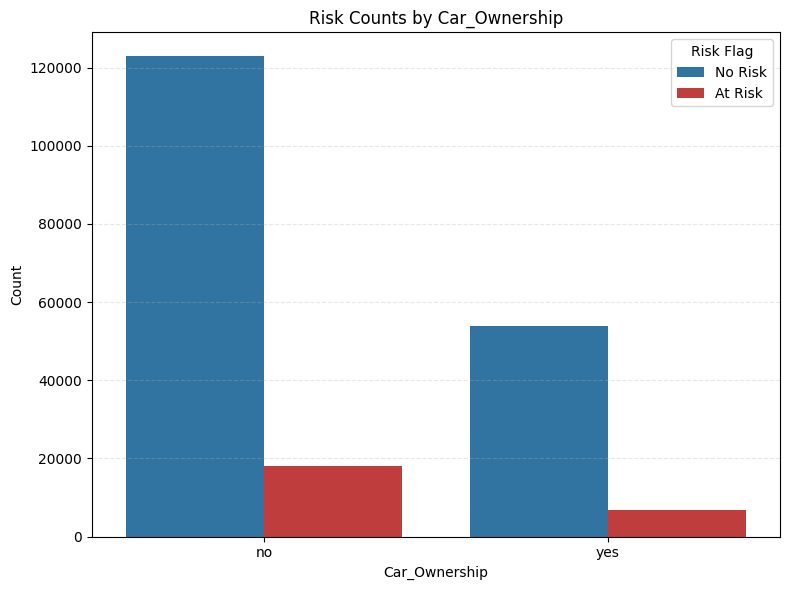

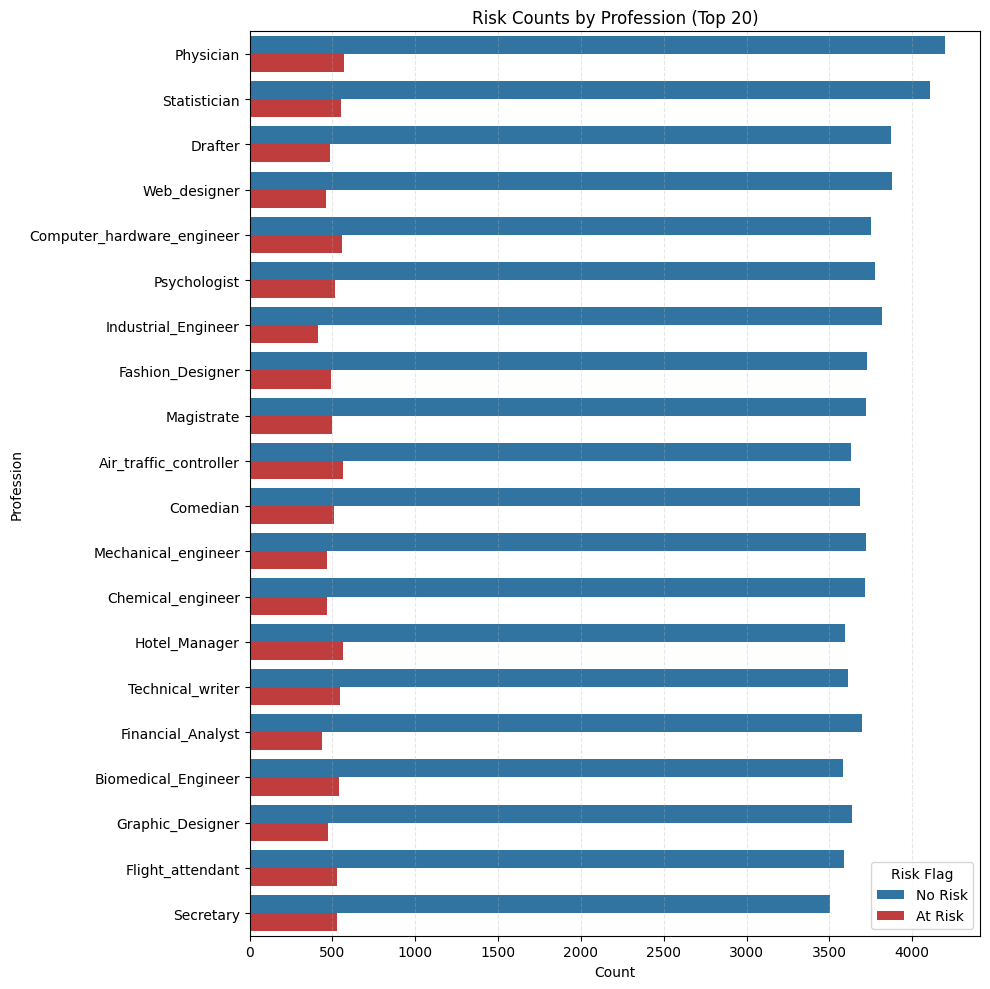

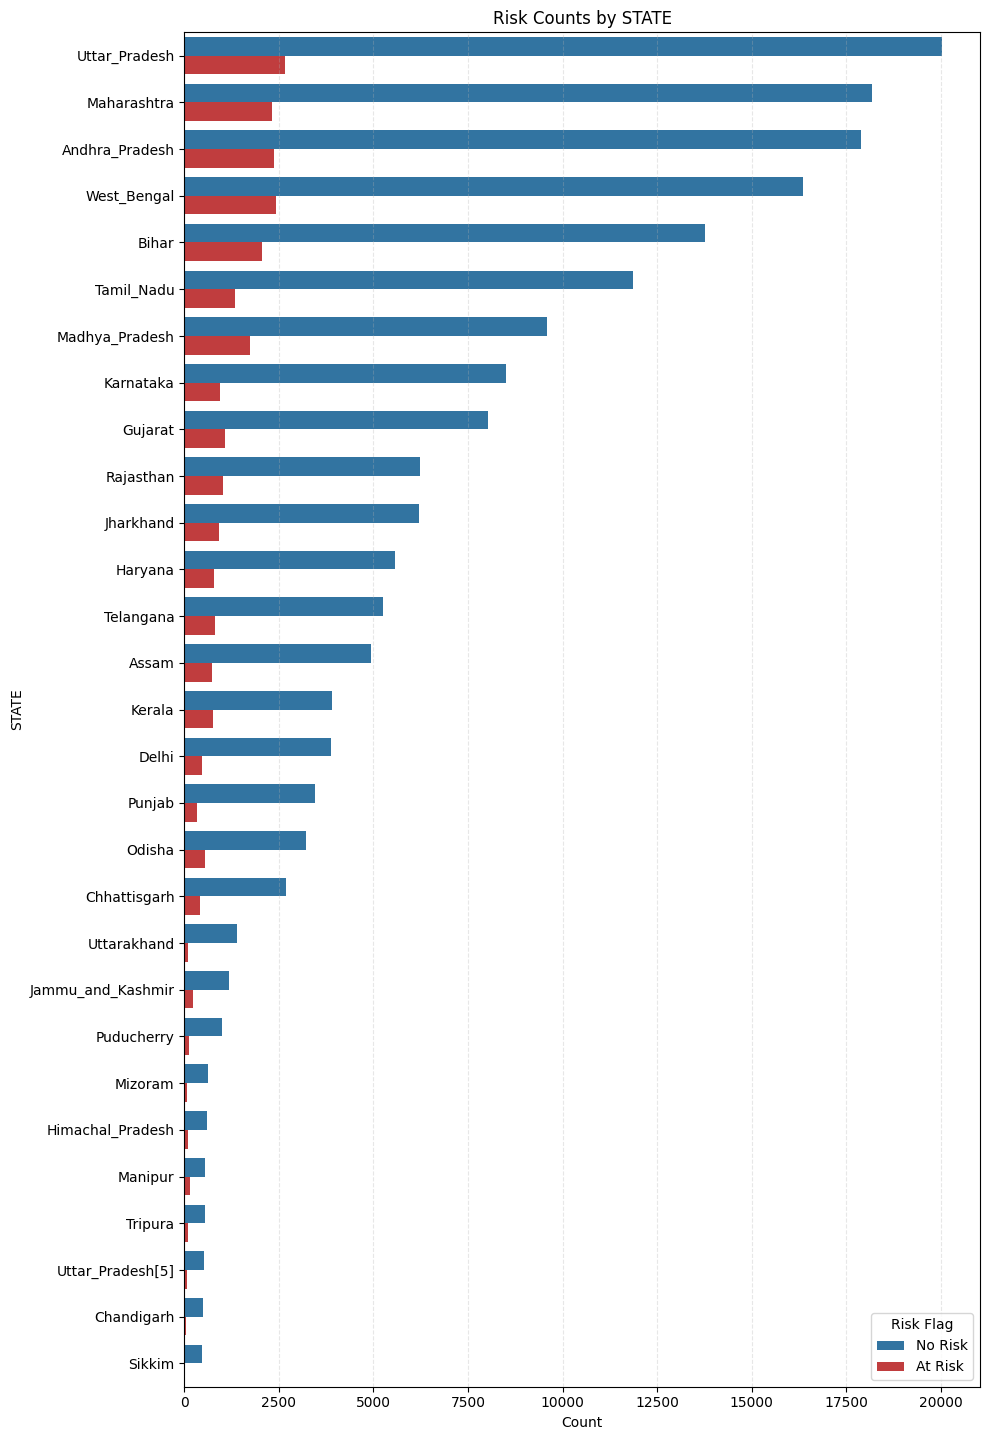

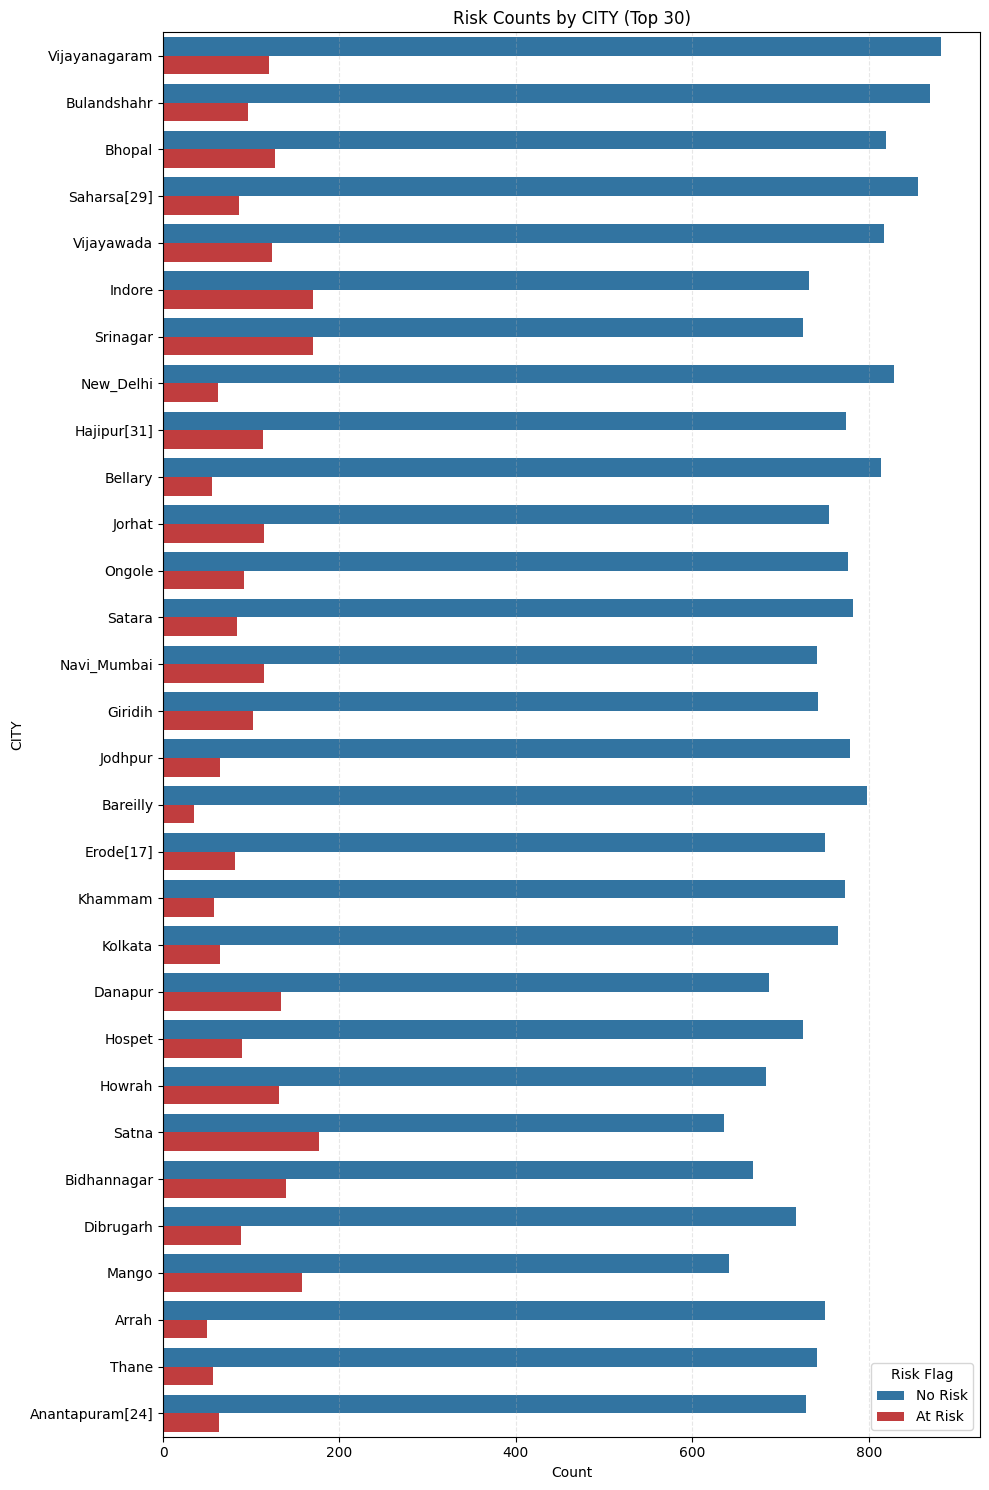

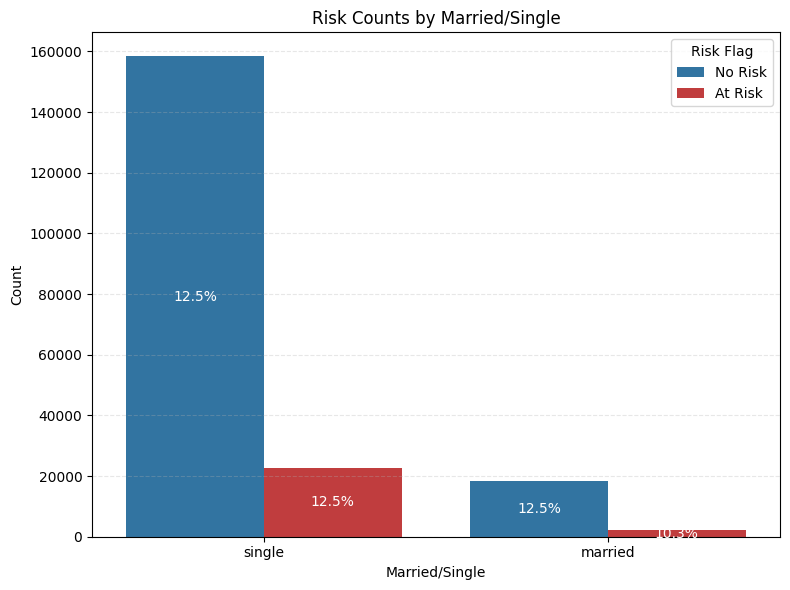

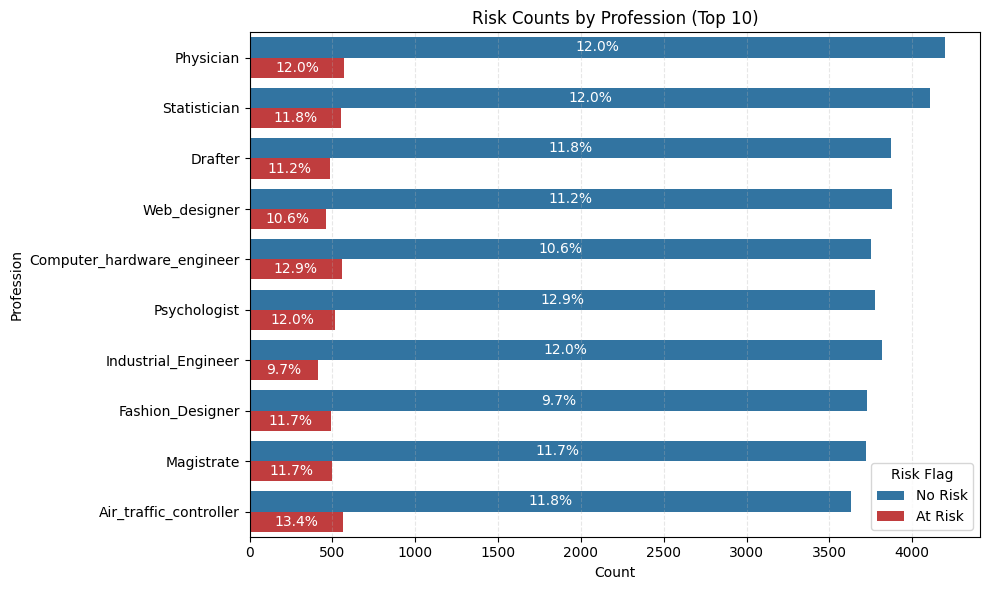

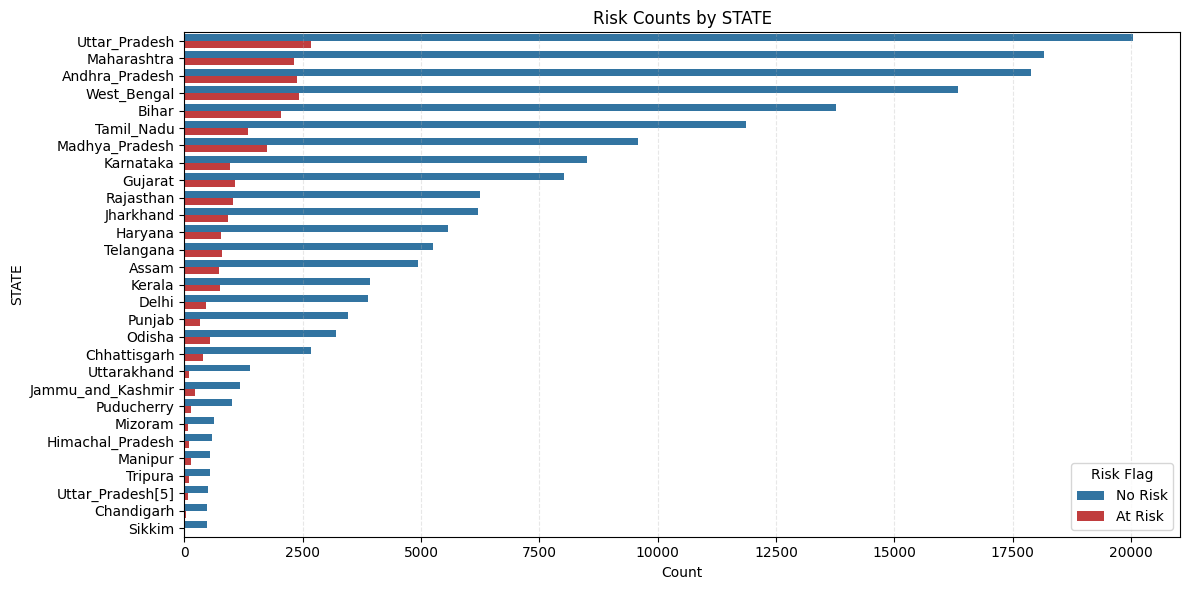

In [36]:
# 1. Binary categories
plot_risk_counts(train_df, 'Married/Single')
plot_risk_counts(train_df, 'House_Ownership')
plot_risk_counts(train_df, 'Car_Ownership')

# 2. Profession (top 20, auto horizontal)
plot_risk_counts(train_df, 'Profession', top_n=20)

# 3. STATE (vertical)
plot_risk_counts(train_df, 'STATE')

# 4. CITY (top 30, horizontal)
plot_risk_counts(train_df, 'CITY', top_n=30, horizontal=True)

# 5. With percentage labels
plot_risk_counts(train_df, 'Married/Single', show_percentage=True)
plot_risk_counts(train_df, 'Profession', top_n=10, show_percentage=True)

# 6. Custom figure size
plot_risk_counts(train_df, 'STATE', figsize=(12, 6))

### HeatMap

In [37]:
# Select numeric columns
numeric_df = train_df.select_dtypes(include=['int64', 'float64'])

# If Risk_Flag isn't numeric, convert it
if 'Risk_Flag' in train_df.columns and train_df['Risk_Flag'].dtype == 'object':
    numeric_df['Risk_Flag'] = train_df['Risk_Flag'].astype('int')

# Handle categorical columns (optional: encode them)
categorical_cols = ['Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE']
for col in categorical_cols:
    if col in train_df.columns:
        # Simple label encoding for demonstration (consider one-hot for nominal categories)
        numeric_df[col] = train_df[col].astype('category').cat.codes

# Drop columns with no variance (if any)
numeric_df = numeric_df.loc[:, numeric_df.nunique() > 1]

In [38]:
corr_matrix = numeric_df.corr(method='pearson')  # For linear relationships
# corr_matrix = numeric_df.corr(method='spearman')  # For monotonic relationships

Hearmap showing various data correlation

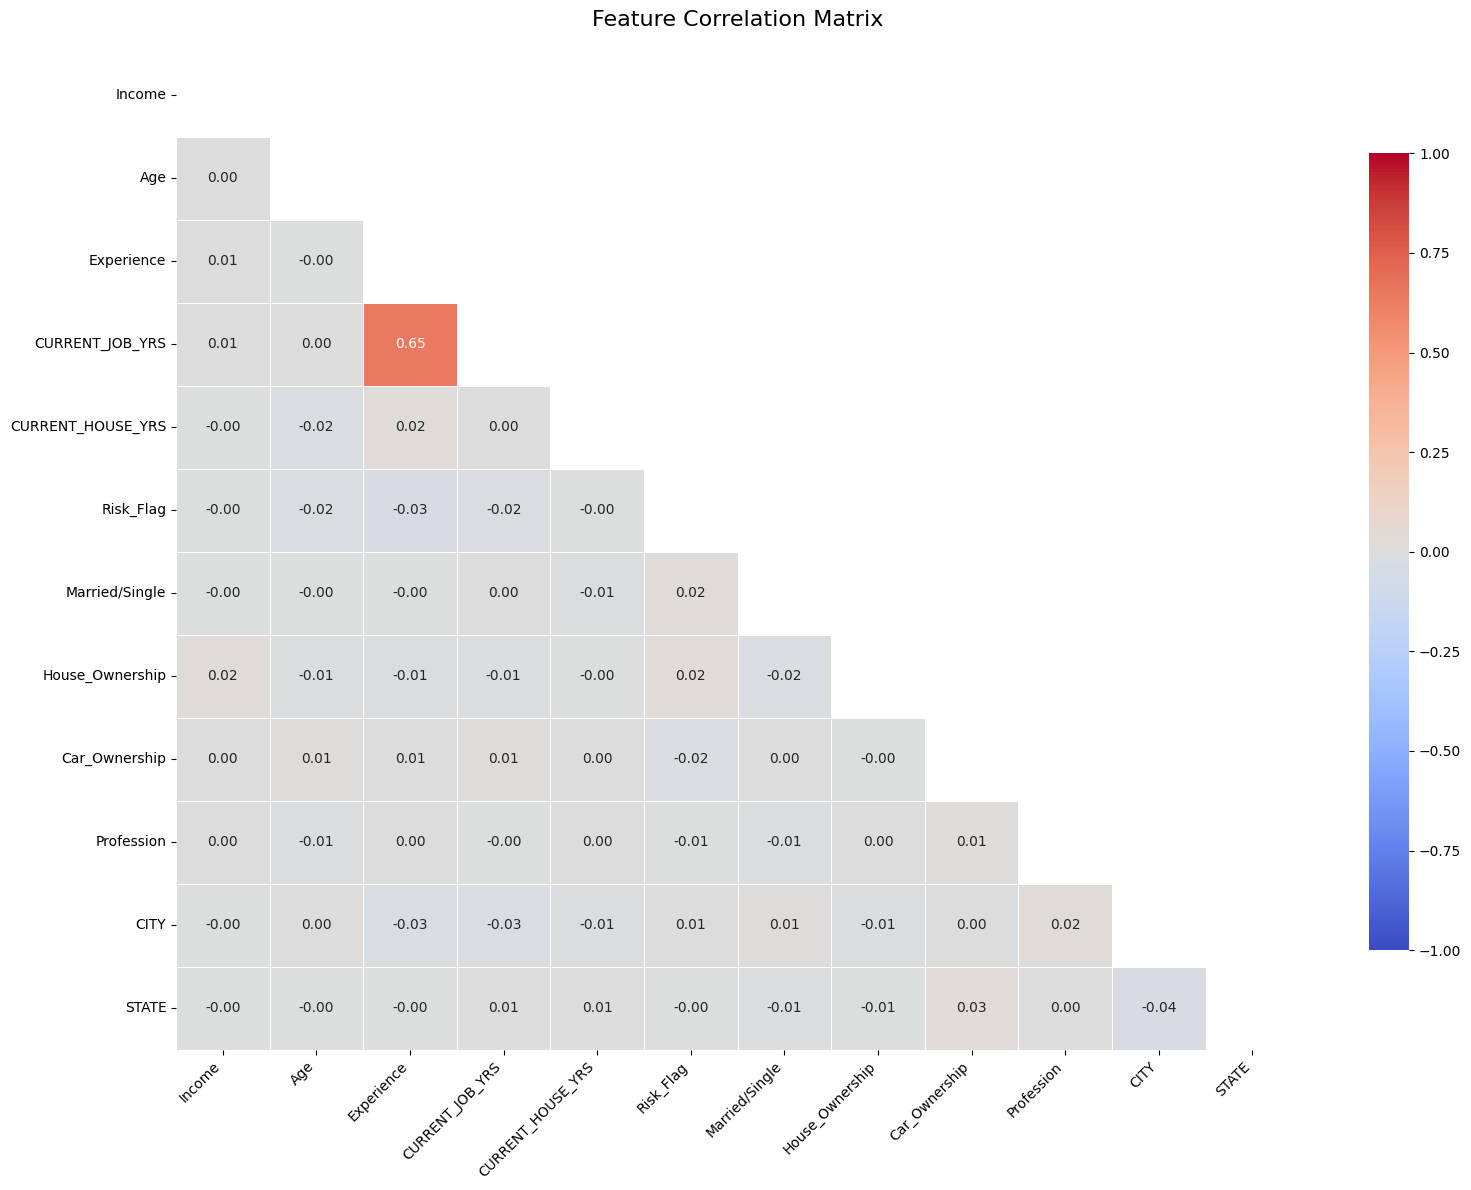

In [39]:
print(" \n")
plt.figure(figsize=(16, 12))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Mask upper triangle

sns.heatmap(corr_matrix,
            mask=mask,
            annot=True,
            fmt=".2f",
            cmap='coolwarm',
            center=0,
            vmin=-1,
            vmax=1,
            linewidths=0.5,
            cbar_kws={"shrink": 0.8})

plt.title("Feature Correlation Matrix", fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# 📊 Insights From Visualization / EDA

## 🔍 Key Borrower Risk Insights for Lenders

---

### **1. Income & Risk Analysis**
- **Highest Risk Group:** Borrowers earning between **20,000–30,000** show a **32.5% risk rate** — a major red flag for lending.
- **Lowest Risk Group:** The **30,000–40,000** income segment has a **risk rate of just 1.7%**, making them ideal candidates.
- **Unexpected Trend:** Even very high-income earners (above **900,000**) still show **12% risk**, indicating that income alone does not guarantee creditworthiness.

---

### **2. Age, Experience & Employment Tenure**
- **Young Borrowers (18–24 years):** Display the **highest risk (17%)**, possibly due to lack of financial discipline or job instability.
- **Senior Borrowers (75+ years):** Exhibit the **lowest risk (5%)**, potentially due to accumulated assets or conservative borrowing behavior.
- **Experience Matters:**
  - **<3 years experience:** Borrowers have a **14–17% risk rate**.
  - **10+ years experience:** Risk drops to **10%**, suggesting that job stability contributes significantly to lower default risk.
  - **Current job years trend:** Borrowers with **less than 1 year** in current job are more likely to borrow, but there's a sharp decrease in borrowing frequency as tenure increases, hitting the lowest at **11 years**.

---

### **3. Lifestyle Risk Indicators**
- **Marital Status:**
  - **Single borrowers:** Show a **12.5% risk rate**.
  - **Married borrowers:** Safer at **10.3%**, indicating family stability may support financial reliability.
- **Housing Situation:**
  - **Renters:** Higher risk at **13.5%**.
  - **Homeowners:** Lower risk at **10.5%**, a strong credit signal.
- **Vehicle Ownership:**
  - **Non-owners:** Show **12.8% risk**.
  - **Car owners:** Slightly lower at **11.1%** — owning a vehicle may be correlated with financial discipline.

---

### **4. Professional Risk Differentiation**
- **High-Risk Professions:**
  - **Police (16.7%)**, **Military (15.6%)**, **Accountants (15.2%)**, and **Software Developers (14.7%)** carry above-average risk.
- **Low-Risk Professions:**
  - **Petroleum Engineers (8.4%)** and **Industrial Engineers (9.7%)** appear financially stable and reliable.

---

### **5. Geographic Risk Patterns**
- **Safest States:**
  - **Sikkim (4%)**, **Uttarakhand (7%)**, **Punjab (9%)**
- **Highest Risk Regions:**
  - **Manipur (21%)**, **Kerala (16%)**, **Tripura (16%)**
  - Indicates regional economic or social factors may play a role in default rates.

---

## 🚨 Dataset Imbalance Warning
- The dataset is **heavily imbalanced**, with:
  - **24,000+ high-risk cases**
  - Only **174,000+ low-risk cases**
- **Implication:** Without correction (e.g. SMOTE, stratified sampling), any ML model trained will be **biased** and overly optimistic in predicting low risk, compromising real-world utility.

---

## ✅ Business Recommendations for Lenders

### **Ideal Borrower Profile to Prioritize**
- **Middle-income earners** (30,000–40,000)
- **Married homeowners** with **10+ years of experience**
- **Senior age group** or **experienced professionals** in engineering
- Residents of **low-risk regions** like Sikkim, Uttarakhand, Punjab

### **Segments to Monitor or Apply Caution**
- **Young, inexperienced applicants**, especially under 25
- **Singles who rent**, or those without vehicle ownership
- **Borrowers in finance, military, or law enforcement roles**
- **Applicants from historically high-risk regions** like Manipur, Tripura, Kerala
- Any group with **<3 years of job experience** or frequent job changes


# 3. DATA CLEANING AND PREPROCESSING

### Check if there's missing Values

In [40]:
train_df.isnull().sum()

,0
Income,0
Age,0
Experience,0
Married/Single,0
House_Ownership,0
Car_Ownership,0
Profession,0
CITY,0
STATE,0
CURRENT_JOB_YRS,0


In [41]:
test_df.isnull().sum()

,0
Income,0
Age,0
Experience,0
Married/Single,0
House_Ownership,0
Car_Ownership,0
Profession,0
CITY,0
STATE,0
CURRENT_JOB_YRS,0


### Check for Duplicates

In [42]:
def check_for_duplicate_rows(df):
    """
    Identify all rows that are exact duplicates (matching all column values).
    Returns a DataFrame showing each duplicated row and how many times it appears.

    Args:
        df: pandas DataFrame

    Returns:
        pd.DataFrame: Contains:
            - Original columns
            - 'duplicate_count': Number of times each row appears
            - 'is_first_occurrence': Marks the first instance of each duplicate set
    """
    # Create a copy to avoid modifying original DataFrame
    df = df.copy()

    # Mark all duplicates (including the first occurrences)
    dup_mask = df.duplicated(keep=False)

    if not dup_mask.any():
        return pd.DataFrame(columns=['duplicate_count', 'is_first_occurrence'] + df.columns.tolist())

    # Extract only duplicate rows
    duplicates = df[dup_mask].copy()

    # Add count of each duplicate group
    duplicates['duplicate_count'] = duplicates.groupby(df.columns.tolist())[df.columns[0]].transform('size')

    # Flag first occurrence
    duplicates['is_first_occurrence'] = ~duplicates.duplicated(keep='first')

    # Add row index for safe sorting (because 'index' may not be a named column)
    duplicates['_original_index'] = duplicates.index

    # Sort by count and original index
    result = duplicates.sort_values(by=['duplicate_count', '_original_index'], ascending=[False, True])

    # Drop helper index
    result = result.drop(columns=['_original_index']).reset_index(drop=True)

    return result[['duplicate_count', 'is_first_occurrence'] + df.columns.tolist()]


In [43]:
values_to_check = train_df.copy()

duplicate_report = check_for_duplicate_rows(values_to_check)

if duplicate_report.empty:
    print("No duplicate rows found in the dataset.")
else:
    total_duplicate_rows = len(duplicate_report)
    unique_duplicate_patterns = duplicate_report.drop_duplicates().shape[0]

    print(f"Number of fully duplicated rows (total occurrences): {total_duplicate_rows}")
    print(f"Number of unique duplicate patterns: {unique_duplicate_patterns}")
    print("\nSample of duplicate rows:")
    print(duplicate_report.shape)


Number of fully duplicated rows (total occurrences): 172944
Number of unique duplicate patterns: 14364

Sample of duplicate rows:
(172944, 14)


### Check for Invalid or Out-of-Range Values

In [44]:
def check_invalid_out_of_range_values(df):
    # Check for negative ages
    negative_ages = df[df["Age"] < 0]
    if not negative_ages.empty:
        print(f"Found {len(negative_ages)} rows with negative ages:")
        print(negative_ages)
    else:
        print("No negative ages found.")

    # Check for income above 1,000,000
    high_income = df[df["Income"] > 1_000_000_0]
    if not high_income.empty:
        print(f"Found {len(high_income)} rows with income above 1,000,000:")
        print(high_income)
    else:
        print("No income values above 1,000,0000 found.")


In [45]:
check_invalid_out_of_range_values(train_df)

No negative ages found.
No income values above 1,000,0000 found.


In [46]:
# Filter and check if income values seem too large
large_incomes = train_df[train_df["Income"] > 10000000]
print(f"Found {len(large_incomes)} rows with income greater than 1 million.")
print(large_incomes.head())

Found 0 rows with income greater than 1 million.
Empty DataFrame
Columns: [Income, Age, Experience, Married/Single, House_Ownership, Car_Ownership, Profession, CITY, STATE, CURRENT_JOB_YRS, CURRENT_HOUSE_YRS, Risk_Flag]
Index: []


# 4. FEATURE SELECTION AND ENGINEERING

### Getting Mid Point of Ages

In [47]:
def group_ages_with_midpoints(df, age_col='Age', bin_size=10):
    """
    Groups ages into bins and computes the midpoint of each bin.

    Parameters:
    - df: pandas DataFrame
    - age_col: name of the age column (default 'Age')
    - bin_size: size of each age bin (default 10)

    Returns:
    - df: original DataFrame with two new columns: 'Age_Group' and 'Age_Midpoint'
    """
    # Define age bin edges
    min_age = df[age_col].min()
    max_age = df[age_col].max()
    bins = np.arange(min_age, max_age + bin_size, bin_size)

    # Create age labels (e.g., '20-30') and midpoints
    labels = [f"{bins[i]}-{bins[i+1]-1}" for i in range(len(bins)-1)]
    midpoints = [(bins[i] + bins[i+1] - 1) / 2 for i in range(len(bins)-1)]

    # Cut ages into groups
    df['Age_Group'] = pd.cut(df[age_col], bins=bins, labels=labels, include_lowest=True)
    df['Age_Midpoint'] = pd.cut(df[age_col], bins=bins, labels=midpoints, include_lowest=True)
    df['Age_Midpoint'] = df['Age_Midpoint'].astype(float)  # Ensure numeric type

    return df


In [48]:
#Train Set
train_df = group_ages_with_midpoints(train_df, age_col='Age', bin_size=10)

#Test Set
test_df = group_ages_with_midpoints(test_df, age_col='Age', bin_size=10)

test_df[['Age', 'Age_Group', 'Age_Midpoint']].head(), test_df[['Age', 'Age_Group', 'Age_Midpoint']].head()

(   Age Age_Group  Age_Midpoint
 0   60     51-60          55.5
 1   77     71-80          75.5
 2   51     41-50          45.5
 3   78     71-80          75.5
 4   30     21-30          25.5,
    Age Age_Group  Age_Midpoint
 0   60     51-60          55.5
 1   77     71-80          75.5
 2   51     41-50          45.5
 3   78     71-80          75.5
 4   30     21-30          25.5)

**We grouped ages and used midpoints to simplify the data, reduce variability, and capture meaningful patterns in how risk changes across life stages. This approach improves model performance, enhances interpretability, and ensures more consistent and reliable risk predictions.**

### ADDING FEATURES TO BOOST ALGORITHM

In [49]:
def feature_engineering(df):
    """
    Enhances the dataset by creating meaningful features that help predict risk.
    Preserves all original data while adding new perspectives on customer behavior.
    """

    # --- Age Features ---
    def age_group_to_midpoint(age_group):
        """Convert age ranges (like '21-30') to single numeric values (25.5)"""
        if isinstance(age_group, str) and '-' in age_group:
            start, end = map(int, age_group.split('-'))
            return (start + end) / 2
        return np.nan

    # Create numeric age from groups
    df['Age_Midpoint'] = df['Age_Group'].apply(age_group_to_midpoint).astype(float)

    # Categorize ages into life stages
    age_bins = [20, 30, 45, 60, 80]
    age_labels = ['young_adult', 'mid_age_early', 'mid_age_late', 'senior_adult']
    df['Age_Category'] = pd.cut(df['Age_Midpoint'], bins=age_bins, labels=age_labels)

    # --- Financial Health Features ---
    # How income compares to age and experience
    epsilon = 1e-6  # Small number to prevent math errors
    df['Income_Age_Ratio'] = df['Income'] / (df['Age_Midpoint'] + epsilon)
    df['Income_Experience_Ratio'] = df['Income'] / (df['Experience'] + epsilon)

    # Wealth measurement combining income, home and car ownership
    df['Wealth_Index'] = (
        df['Income'] * df['House_Ownership'].map({'Rented': 0.5, 'Owned': 1, 'Norent_Noown': 0}).fillna(0) +
        df['Car_Ownership'].map({'yes': 1, 'no': 0}).fillna(0)
    )

    # --- Stability Features ---
    # Job and housing stability measurements
    df['Job_Stability'] = df['CURRENT_JOB_YRS'] / (df['Experience'] + 1)
    df['House_Stability_Score'] = df['CURRENT_HOUSE_YRS'] / (df['Age_Midpoint'] - 18 + 1)

    # --- Career Features ---
    # Professional experience level
    career_bins = [0, 5, 15, 50]
    career_labels = ['Early', 'Mid', 'Late']
    df['Career_Stage'] = pd.cut(df['Experience'], bins=career_bins, labels=career_labels, right=False)

    # Combined life/career stage
    df['Life_Stage'] = df['Age_Category'].astype(str) + "_" + df['Career_Stage'].astype(str)

    # --- Profession Features ---
    # Group similar professions together
    profession_groups = {
        'tech': ['Software_Developer', 'Engineer', ...],  # shortened for example
        'healthcare': ['Physician', 'Dentist', ...],
        # ... other groups ...
    }
    prof_to_group = {prof: group for group, profs in profession_groups.items() for prof in profs}
    df['Profession_Group'] = df['Profession'].map(lambda p: prof_to_group.get(p, 'other'))

    # --- Final Touches ---
    # Handle any missing values
    df['Career_Stage'] = df['Career_Stage'].cat.add_categories('Unknown').fillna('Unknown')

    return df

In [50]:
train_df = feature_engineering(train_df)
test_df = feature_engineering(test_df)

🧠 Feature Engineering Strategy (Non-Technical Explanation)
Our goal is to transform raw data into meaningful features that reflect how people live, work, and manage money. This gives the model context, not just numbers.

🎂 Age Insights
✅ We convert age groups into numeric midpoints
E.g., "21-30" becomes 25.5

✅ We categorize customers by life stage
Young adult, mid-career, senior adult, etc.

Why it matters:
📌 Different age groups show different financial behaviors and risk levels (e.g., young adults might earn less but take more financial risks).

💰 Financial Health Indicators
✅ We compute the income-to-age and income-to-experience ratios
Shows how well income aligns with a person's age and experience

✅ We create a Wealth Index
Combines income, home ownership, and car ownership into a single score

Why it matters:
📌 These features help identify if someone’s income and assets are appropriate for their life stage or potentially inconsistent.

🏠 Stability Metrics
✅ We measure job stability
Years in current job vs. total work experience

✅ We measure home stability
Years in current house vs. age

Why it matters:
📌 People who change jobs or homes frequently may indicate higher financial or lifestyle risk.

🧑‍💼 Career Development
✅ We determine career stage
Early (0–5 years), Mid (5–15 years), Late (15+ years)

✅ We combine age group + career stage
E.g., “mid_age_early” + “Mid” career

Why it matters:
📌 Career maturity influences financial planning and risk behavior.

👩‍🔬 Profession Groups
✅ We group similar professions together
E.g., Engineers, Healthcare, Government, Creative, Finance

Why it matters:
📌 People in similar careers often have predictable income patterns and financial habits. This allows the model to compare apples to apples.

🎯 Key Benefits
✅ Reflects real-life behaviors, not just raw numbers
✅ Helps the model understand people’s financial context
✅ Mathematically sound (avoids divide-by-zero errors)
✅ Keeps original data intact — only adds context
✅ Encourages fair comparisons between similar users

These features help your risk model make smarter, more human-like decisions based on realistic financial behavior — not just columns of numbers.



In [51]:
train_df.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,...,Age_Midpoint,Age_Category,Income_Age_Ratio,Income_Experience_Ratio,Wealth_Index,Job_Stability,House_Stability_Score,Career_Stage,Life_Stage,Profession_Group
0,4588175,49,20,single,rented,no,Secretary,Bilaspur,Chhattisgarh,6,...,45.5,mid_age_late,100839.008773,2.294087e+05,0.0,0.285714,0.385965,Late,mid_age_late_Late,other
1,6510821,31,15,single,rented,no,Librarian,Amritsar,Punjab,12,...,25.5,young_adult,255326.303713,4.340547e+05,0.0,0.750000,1.176471,Late,young_adult_Late,other
2,9338129,26,7,single,rented,no,Artist,Farrukhabad,Uttar_Pradesh,4,...,25.5,young_adult,366201.122894,1.334018e+06,0.0,0.500000,1.647059,Mid,young_adult_Mid,other
3,8053436,42,8,single,rented,no,Chef,Mysore[7][8][9],Karnataka,8,...,45.5,mid_age_late,176998.589517,1.006679e+06,0.0,0.888889,0.385965,Mid,mid_age_late_Mid,other
4,3589662,42,18,single,rented,yes,Technical_writer,Bareilly,Uttar_Pradesh,13,...,45.5,mid_age_late,78893.668596,1.994257e+05,1.0,0.684211,0.456140,Late,mid_age_late_Late,other


In [52]:
test_df.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,...,Age_Midpoint,Age_Category,Income_Age_Ratio,Income_Experience_Ratio,Wealth_Index,Job_Stability,House_Stability_Score,Career_Stage,Life_Stage,Profession_Group
0,2687545,60,3,single,rented,yes,Technical_writer,Mango,Jharkhand,3,...,55.5,mid_age_late,48424.233362,8.958480e+05,1.0,0.750000,0.285714,Early,mid_age_late_Early,other
1,9559493,77,3,single,rented,no,Army_officer,Sirsa,Haryana,3,...,75.5,senior_adult,126615.799647,3.186497e+06,0.0,0.750000,0.222222,Early,senior_adult_Early,other
2,5203215,51,19,single,rented,no,Civil_servant,Hajipur[31],Bihar,8,...,45.5,mid_age_late,114356.371113,2.738534e+05,0.0,0.400000,0.456140,Late,mid_age_late_Late,other
3,7235618,78,16,single,owned,no,Artist,Tadepalligudem,Andhra_Pradesh,14,...,75.5,senior_adult,95835.998731,4.522261e+05,0.0,0.823529,0.188034,Late,senior_adult_Late,other
4,4408094,30,8,single,rented,yes,Petroleum_Engineer,Saharsa[29],Bihar,4,...,25.5,young_adult,172866.424593,5.510117e+05,1.0,0.444444,1.176471,Mid,young_adult_Mid,other


In [53]:
# prompt: Drop Age_Group in train_df and test_df

# Drop 'Age_Group' from train_df and test_df
train_df = train_df.drop(columns=['Age_Group'], errors='ignore')
test_df = test_df.drop(columns=['Age_Group'], errors='ignore')


## Splitting Data Set

In [54]:
train_X = train_df.drop(["Risk_Flag"], axis=1)
train_y = train_df["Risk_Flag"]

test_X = test_df

In [55]:
test_X.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,...,Age_Midpoint,Age_Category,Income_Age_Ratio,Income_Experience_Ratio,Wealth_Index,Job_Stability,House_Stability_Score,Career_Stage,Life_Stage,Profession_Group
0,2687545,60,3,single,rented,yes,Technical_writer,Mango,Jharkhand,3,...,55.5,mid_age_late,48424.233362,8.958480e+05,1.0,0.750000,0.285714,Early,mid_age_late_Early,other
1,9559493,77,3,single,rented,no,Army_officer,Sirsa,Haryana,3,...,75.5,senior_adult,126615.799647,3.186497e+06,0.0,0.750000,0.222222,Early,senior_adult_Early,other
2,5203215,51,19,single,rented,no,Civil_servant,Hajipur[31],Bihar,8,...,45.5,mid_age_late,114356.371113,2.738534e+05,0.0,0.400000,0.456140,Late,mid_age_late_Late,other
3,7235618,78,16,single,owned,no,Artist,Tadepalligudem,Andhra_Pradesh,14,...,75.5,senior_adult,95835.998731,4.522261e+05,0.0,0.823529,0.188034,Late,senior_adult_Late,other
4,4408094,30,8,single,rented,yes,Petroleum_Engineer,Saharsa[29],Bihar,4,...,25.5,young_adult,172866.424593,5.510117e+05,1.0,0.444444,1.176471,Mid,young_adult_Mid,other


In [56]:
print(train_X.shape, train_y.shape, test_X.shape)

(201600, 21) (201600,) (50400, 21)


### Heatmap with new added features

In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import numpy as np

def encode_categorical(df):
    """
    Returns a copy of df with label-encoded categorical columns.
    Also returns list of encoded columns.
    """
    df_copy = df.copy()
    encoded_cols = []
    for col in df_copy.select_dtypes(include=['object', 'category']):
        le = LabelEncoder()
        df_copy[col] = le.fit_transform(df_copy[col].astype(str))
        encoded_cols.append(col)
    return df_copy, encoded_cols

def compute_correlation_matrix(df, method='pearson'):
    """
    Returns correlation matrix of the DataFrame.
    """
    numeric_df = df.select_dtypes(include=[np.number])
    return numeric_df.corr(method=method)

def plot_correlation_heatmap(df, title="Correlation Heatmap", figsize=(12, 8), annot=False):
    """
    Plots a correlation heatmap for all numeric features in df.
    """
    corr = compute_correlation_matrix(df)
    plt.figure(figsize=figsize)
    sns.heatmap(corr, annot=annot, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title(title)
    plt.show()

def plot_feature_importance(df, target_column, top_n=20, random_state=42):
    """
    Trains a Random Forest model and plots top N feature importances.
    Does not modify the original DataFrame.
    """
    df_copy = df.copy()

    # Drop rows with missing values in target or features
    df_copy = df_copy.dropna(subset=[target_column])

    # Separate features and target
    X = df_copy.drop(columns=[target_column])
    y = df_copy[target_column]

    # Encode categorical features safely
    X_encoded, _ = encode_categorical(X)

    # Train model
    model = RandomForestClassifier(n_estimators=100, random_state=random_state)
    model.fit(X_encoded, y)

    # Feature importances
    importances = pd.Series(model.feature_importances_, index=X_encoded.columns)
    importances = importances.sort_values(ascending=False).head(top_n)

    # Plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=importances, y=importances.index, palette='viridis')
    plt.title(f'Top {top_n} Feature Importances')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()


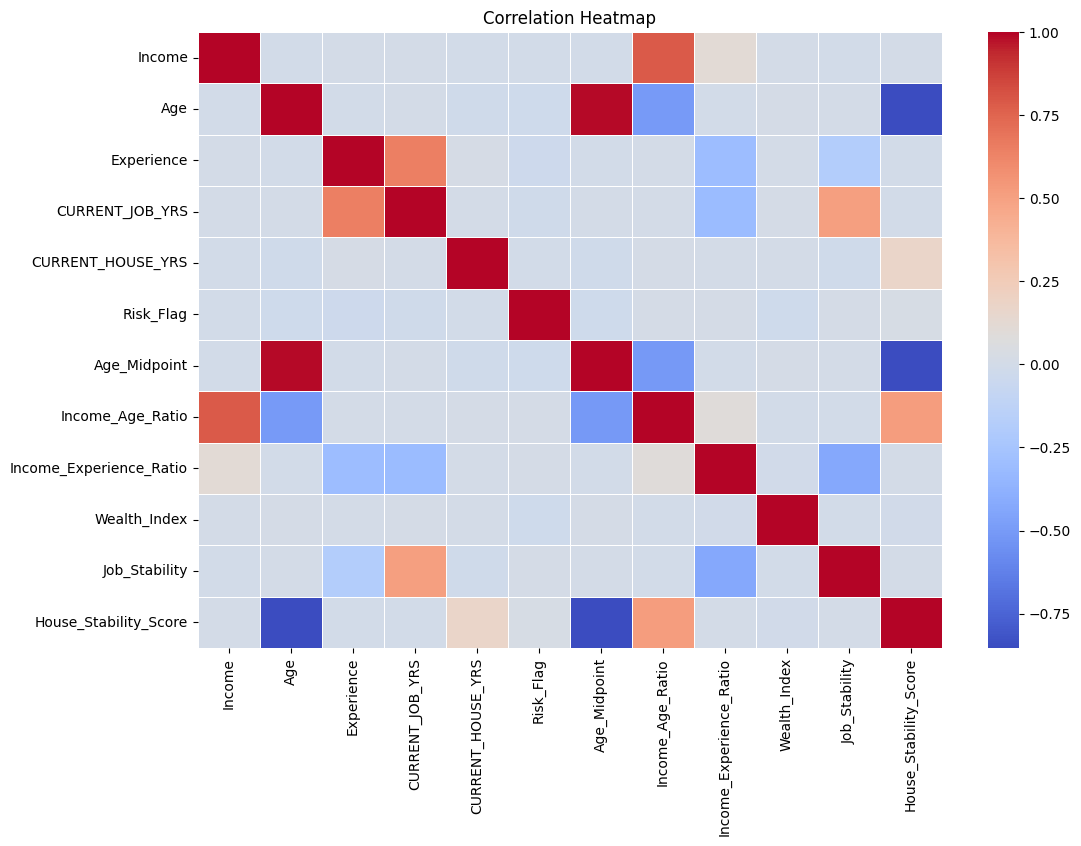

<ipython-input-57-8307211ff142>:65: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




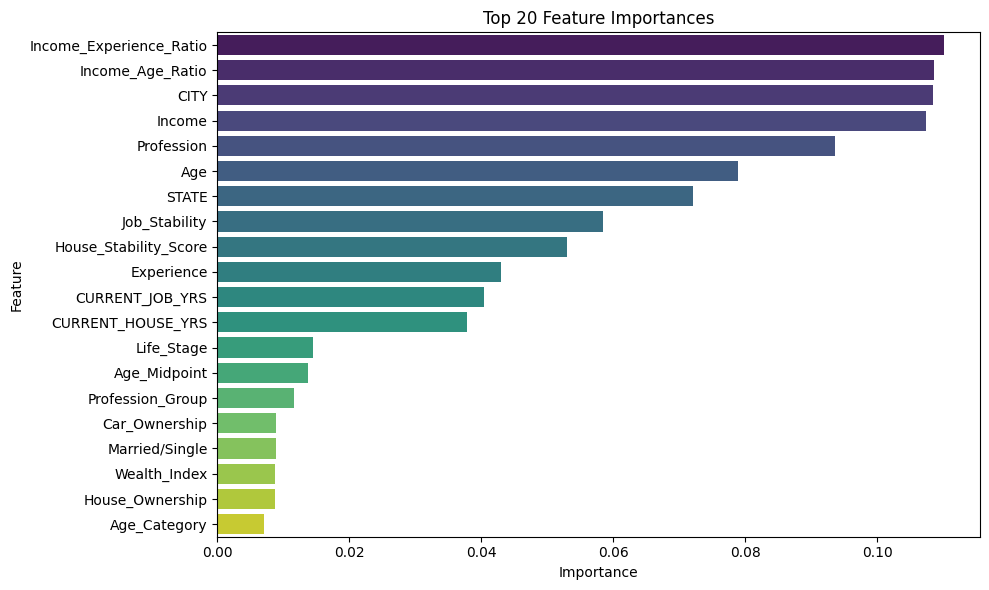

In [58]:
plot_correlation_heatmap(train_df)

plot_feature_importance(train_df, target_column='Risk_Flag')


### Spliting Train Set Into Train Set and Test Set

In [59]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_y, test_size=0.2, random_state=42)

In [60]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape, test_X.shape )

(161280, 21) (40320, 21) (161280,) (40320,) (50400, 21)


### Encoding Categorical Features for Train and Test Set

In [61]:
from sklearn.preprocessing import OrdinalEncoder
from category_encoders import TargetEncoder, BinaryEncoder
import pandas as pd
import numpy as np

def encode_category_data(train_set, test_set=None):
    """
    Categorical encoding that transforms columns in-place without adding new columns.
    - Binary features: Ordinal Encoding
    - High-cardinality: Target Encoding (if target exists) or Binary Encoding (in-place)
    - Medium-cardinality: Binary Encoding (in-place)
    - Ordinal features: Manual Ordinal Encoding
    """
    # Create copies to avoid modifying original data
    train_set = train_set.copy()
    if test_set is not None:
        test_set = test_set.copy()

    # --- Binary Features ---
    binary_cols = ['Married/Single', 'Car_Ownership', 'Wealth_Index']
    for col in binary_cols:
        if col in train_set.columns:
            oe = OrdinalEncoder(
                handle_unknown='use_encoded_value',
                unknown_value=-1,
                dtype=np.int64
            )
            train_set[col] = oe.fit_transform(train_set[[col]])
            if test_set is not None and col in test_set.columns:
                test_set[col] = oe.transform(test_set[[col]])

    # --- High-Cardinality Features ---
    high_card_cols = ['Profession', 'CITY', 'STATE']
    if 'Risk_Flag' in train_set.columns:
        # Target Encoding - will replace original columns
        te = TargetEncoder(cols=high_card_cols, smoothing=5)
        train_set[high_card_cols] = te.fit_transform(train_set[high_card_cols], train_set['Risk_Flag'])[high_card_cols]
        if test_set is not None:
            test_set[high_card_cols] = te.transform(test_set[high_card_cols])[high_card_cols]
    else:
        # Binary Encoding - will replace original columns with binary representations
        be = BinaryEncoder(cols=high_card_cols, return_df=True)
        train_encoded = be.fit_transform(train_set[high_card_cols])
        # Get just enough binary columns to replace original ones
        for col in high_card_cols:
            if col in train_set.columns:
                # Find columns that start with the original name
                encoded_cols = [c for c in train_encoded.columns if c.startswith(col)]
                # Replace original column with first encoded column
                train_set[col] = train_encoded[encoded_cols[0]]
                if test_set is not None and col in test_set.columns:
                    test_encoded = be.transform(test_set[high_card_cols])
                    test_set[col] = test_encoded[encoded_cols[0]]

    # --- Medium-Cardinality Features ---
    medium_card_cols = ['House_Ownership', 'Profession_Group']
    if medium_card_cols:
        be = BinaryEncoder(cols=medium_card_cols, return_df=True)
        train_encoded = be.fit_transform(train_set[medium_card_cols])
        for col in medium_card_cols:
            if col in train_set.columns:
                encoded_cols = [c for c in train_encoded.columns if c.startswith(col)]
                train_set[col] = train_encoded[encoded_cols[0]]
                if test_set is not None and col in test_set.columns:
                    test_encoded = be.transform(test_set[medium_card_cols])
                    test_set[col] = test_encoded[encoded_cols[0]]

    # --- Ordinal Features ---
    ordinal_mappings = {
        'Career_Stage': [0, 1, 2],  # Already encoded
        'Age_Category': ['0', '1', '2', '3'],  # Already encoded
        'Life_Stage': [str(i) for i in range(12)],  # 0-11
        'CURRENT_JOB_YRS': [str(i) for i in range(15)],  # 0-14
        'CURRENT_HOUSE_YRS': [str(i) for i in range(11, 15)],  # 11-14
        'House_Stability_Score': [str(i) for i in range(30)],  # Assuming 0-29
        'Job_Stability': [str(i) for i in range(106)]  # Assuming 0-105
    }

    for col, order in ordinal_mappings.items():
        if col in train_set.columns:
            oe = OrdinalEncoder(
                categories=[order],
                handle_unknown='use_encoded_value',
                unknown_value=-1,
                dtype=np.int64
            )
            train_set[col] = oe.fit_transform(train_set[[col]].astype(str))
            if test_set is not None and col in test_set.columns:
                test_set[col] = oe.transform(test_set[[col]].astype(str))

    return (train_set, test_set) if test_set is not None else train_set


🧮 Non-Technical Explanation:
Why Use Different Encoding Methods?
We use different encoding techniques for different types of features because not all data is created equal. Some values are simple, while others carry deeper meaning or order.

✅ Simple Yes/No Features
Examples: Married/Single, Car_Ownership

Encoding method: Binary (e.g., "yes" → 1, "no" → 0)

Why? These are straightforward and don’t need complex logic.

📌 Benefit: Fast, simple, and effective.

🏙️ Cities, States, Professions
Examples: CITY, STATE, Profession

Encoding method: Target Encoding
(Values are replaced by their average risk outcome.)

Why? With hundreds of unique entries, we want to keep their risk patterns without creating hundreds of columns.

🔍 Example:
Doctors might have lower risk than artists. This method preserves that insight.

📌 Benefit: Efficiently captures real-world effects of categories on risk.

🏠 Home Ownership & Marital/Home Status
Examples: House_Ownership, Marital_Home_Status

Encoding method: Binary Encoding
(Categories are converted into compact binary values.)

Why? They have few unique values (3–6), so this method keeps it efficient without losing patterns.

📌 Benefit: Avoids unnecessary complexity while keeping category relationships.

📈 Career Stages & Age Groups
Examples: Career_Stage, age_group

Encoding method: Ordered Encoding
(Early → Mid → Late becomes 0 → 1 → 2)

Why? These represent natural progressions in life.
E.g., Someone in "mid-career" is between early and late.

📌 Benefit: The model understands real-life order and treats it properly.

🎯 Key Benefits of This Approach
✅ Preserves original structure of your dataset
✅ No major code changes needed
✅ Captures human-like patterns in risk behavior
✅ Efficient and scalable across many features
✅ Supports life-stage modeling and meaningful comparisons
✅ Improves accuracy while staying lightweight

🎓 Bottom Line:
Each encoding method is carefully matched to the nature of the feature. This ensures the model treats your data in a way that’s both smart and practical.

In [62]:
train_df.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,...,Age_Midpoint,Age_Category,Income_Age_Ratio,Income_Experience_Ratio,Wealth_Index,Job_Stability,House_Stability_Score,Career_Stage,Life_Stage,Profession_Group
0,4588175,49,20,single,rented,no,Secretary,Bilaspur,Chhattisgarh,6,...,45.5,mid_age_late,100839.008773,2.294087e+05,0.0,0.285714,0.385965,Late,mid_age_late_Late,other
1,6510821,31,15,single,rented,no,Librarian,Amritsar,Punjab,12,...,25.5,young_adult,255326.303713,4.340547e+05,0.0,0.750000,1.176471,Late,young_adult_Late,other
2,9338129,26,7,single,rented,no,Artist,Farrukhabad,Uttar_Pradesh,4,...,25.5,young_adult,366201.122894,1.334018e+06,0.0,0.500000,1.647059,Mid,young_adult_Mid,other
3,8053436,42,8,single,rented,no,Chef,Mysore[7][8][9],Karnataka,8,...,45.5,mid_age_late,176998.589517,1.006679e+06,0.0,0.888889,0.385965,Mid,mid_age_late_Mid,other
4,3589662,42,18,single,rented,yes,Technical_writer,Bareilly,Uttar_Pradesh,13,...,45.5,mid_age_late,78893.668596,1.994257e+05,1.0,0.684211,0.456140,Late,mid_age_late_Late,other


In [63]:
# Encode both train and test sets
X_train, X_test = encode_category_data(X_train, X_test)

# Encode test_X (which lacks Risk_Flag)
test_X = encode_category_data(test_X)


In [64]:
print(X_train.shape, X_test.shape, test_X.shape)

(161280, 21) (40320, 21) (50400, 21)


In [65]:
def print_set_to_put_in_model(x,y,z) :
  print(x)
  print(y)
  print(z)

print_set_to_put_in_model(X_train, X_test, test_X)

         Income  Age  Experience  Married/Single  House_Ownership  \
57654   6670038   37          13               1                0   
115853  2572120   22           0               1                0   
130470  4341353   78           6               1                1   
39155   3177468   42          17               0                0   
175732  7710970   39          13               1                0   
...         ...  ...         ...             ...              ...   
119879  7847940   64          16               1                0   
103694  4011175   71           5               1                0   
131932  3032812   50          14               1                0   
146867  1405716   51           0               1                0   
121958  3352999   54          16               1                0   

        Car_Ownership  Profession  CITY  STATE  CURRENT_JOB_YRS  ...  \
57654               0           0     0      0                5  ...   
115853              0      

In [66]:
# prompt: Print no of unique items in X_train and list them

# Assuming X_train is already defined as in your provided code.
unique_items = X_train.nunique()
print(f"Number of unique items in each column of X_train:\n{unique_items}")

for col in X_train.columns:
  print(f"\nUnique values in column '{col}':")
  print(X_train[col].unique())


Number of unique items in each column of X_train:
Income                     28796
Age                           59
Experience                    21
Married/Single                 2
House_Ownership                2
Car_Ownership                  2
Profession                     2
CITY                           2
STATE                          2
CURRENT_JOB_YRS               15
CURRENT_HOUSE_YRS              5
Age_Midpoint                   6
Age_Category                   1
Income_Age_Ratio           28834
Income_Experience_Ratio    28833
Wealth_Index                   2
Job_Stability                  1
House_Stability_Score          1
Career_Stage                   1
Life_Stage                     1
Profession_Group               2
dtype: int64

Unique values in column 'Income':
[6670038 2572120 4341353 ... 2545687 3032812 1405716]

Unique values in column 'Age':
[37 22 78 42 39 68 27 74 45 43 23 44 72 57 75 65 59 24 52 28 53 56 41 50
 54 51 70 29 32 47 26 38 62 77 66 69 55 58 30 25 4

In [67]:
X_train.shape, X_test.shape, test_X.shape

((161280, 21), (40320, 21), (50400, 21))

### Applying Standard Scalling

In [68]:
# Initialize the scaler
scaler = StandardScaler()

# Fit on train set, transform both train and test
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [69]:
print(X_train.shape, X_test.shape)

(161280, 21) (40320, 21)


# 5. MODEL DEVELOPMENT

# Copy and add insight

In [70]:
# Assuming y_train is a pandas Series
sum_of_rows = y_train.sum()
num_rows = len(y_train)
num_zeros = num_rows - sum_of_rows

print(f"Sum of rows with 1: {sum_of_rows}")
print(f"Sum of rows with 0: {num_zeros}")


Sum of rows with 1: 19902
Sum of rows with 0: 141378


In our dataset, we have two types of outcomes:

"1" means a positive case (like a customer defaulting, a machine failing, etc.) — we have 19,902 of these.

"0" means a negative case (everything is normal) — we have 141,378 of these.

That means the positive cases are much fewer, making up only about 12% of the data. This is a problem because most machine learning models tend to focus on the majority group (the 0s), and might ignore or miss the minority group (the 1s), which is usually the most important one to catch.

How are we fixing this?
We’re using a method called SMOTE, which helps balance the data. Think of it like this:

If you were trying to learn what cats look like but only had a few cat photos and a lot of dog photos, you'd struggle. SMOTE helps by "creating new, slightly different cat photos" based on the few real ones you have. This gives your brain (or in this case, the model) a better chance to learn what a cat really looks like.

Why it matters
By using SMOTE, we're giving our model a better chance to:

Notice the rare, important cases.

Avoid being biased toward the majority.

Make more accurate and fair predictions.

In [71]:
# Using smote to fix data imbalance


# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply to training data only
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)


## Function To Train model, Predict and Check Accuracy

In [72]:
# Function to train the models
def train_models(algorithms, x_train_scaled, y_train):
    models = {}
    for name, model in algorithms.items():
        model.fit(x_train_scaled, y_train)
        models[name] = model
    return models

# Function to predict with the models
def predict(models, x_test_scaled):
    predictions = {}
    for name, model in models.items():
        y_pred = model.predict(x_test_scaled)
        y_pred_proba = model.predict_proba(x_test_scaled)[:, 1] if hasattr(model, "predict_proba") else None
        predictions[name] = {
            'y_pred': y_pred,
            'y_pred_proba': y_pred_proba
        }
    return predictions

# Function to check accuracy and performance
def check_accuracy(models, predictions, x_test_scaled, y_test):
    results = {}
    for name, model in models.items():
        y_pred = predictions[name]['y_pred']
        y_pred_proba = predictions[name]['y_pred_proba']

        accuracy = accuracy_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else "N/A"
        report = classification_report(y_test, y_pred)

        results[name] = {
            'Accuracy': accuracy,
            'ROC AUC': roc_auc,
            'Classification Report': report
        }
        # Print results
        print(f"Algorithm: {name}")
        print(f"Accuracy: {accuracy}")
        print(f"ROC AUC: {roc_auc}")
        print("Classification Report:")
        print(report)
        print("-" * 50)

    return results

# Define the algorithms
algorithms = {
    # 'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    # 'Gradient Boosting': GradientBoostingClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    # 'K-Nearest Neighbors': KNeighborsClassifier(),
    # 'Naive Bayes': GaussianNB(),
    # 'AdaBoost': AdaBoostClassifier(),
    'Extra Trees': ExtraTreesClassifier()
    # 'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Using the functions
# models = train_models(algorithms, x_train, y_train
# predictions = predict(models, x_test)
# results = check_accuracy(models, predictions, x_test, y_test)


## Train Set

### Train

In [73]:
models_train = train_models(algorithms, X_train_balanced, y_train_balanced)

### Predict

In [74]:
predictions_train = predict(models_train, X_test)

## TEST SET

### Predict

In [75]:
print(test_X)

        Income  Age  Experience  Married/Single  House_Ownership  \
0      2687545   60           3               1                0   
1      9559493   77           3               1                0   
2      5203215   51          19               1                0   
3      7235618   78          16               1                1   
4      4408094   30           8               1                0   
...        ...  ...         ...             ...              ...   
50395   912537   27          20               1                0   
50396  2657803   61           9               1                0   
50397  4106348   73          19               1                0   
50398  6982803   38          17               1                0   
50399  8600356   40          19               1                0   

       Car_Ownership  Profession  CITY  STATE  CURRENT_JOB_YRS  ...  \
0                  1           0     0      0                3  ...   
1                  0           0     0   

In [76]:
predictions_test = predict(models_train, test_X)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning:

X has feature names, but DecisionTreeClassifier was fitted without feature names

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning:

X has feature names, but DecisionTreeClassifier was fitted without feature names

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning:

X has feature names, but ExtraTreesClassifier was fitted without feature names

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning:

X has feature names, but ExtraTreesClassifier was fitted without

# EVALUATION METRICS

## Accuracy

### Train Set

In [77]:
results = check_accuracy(models_train, predictions_train, X_test, y_test)

Algorithm: Random Forest
Accuracy: 0.8904513888888889
ROC AUC: 0.9391028788959968
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.90      0.94     35466
           1       0.53      0.79      0.63      4854

    accuracy                           0.89     40320
   macro avg       0.75      0.85      0.78     40320
weighted avg       0.92      0.89      0.90     40320

--------------------------------------------------
Algorithm: Decision Tree
Accuracy: 0.872470238095238
ROC AUC: 0.8491805501562562
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.88      0.92     35466
           1       0.48      0.83      0.61      4854

    accuracy                           0.87     40320
   macro avg       0.73      0.85      0.77     40320
weighted avg       0.91      0.87      0.89     40320

--------------------------------------------------
Algorithm: Extra Trees
Accuracy: 0.

In [79]:
!pip install gradio
import gradio as gr
from sklearn.metrics import classification_report

def parse_classification_report(report_str, model_name):
    """Parse sklearn classification report string into DataFrame."""
    lines = [line.strip() for line in report_str.split('\n') if line.strip()]
    parsed = []

    for line in lines:
        if line.startswith('precision') or line.startswith('              precision'):
            continue

        if 'accuracy' in line:
            parts = line.split()
            acc_idx = parts.index('accuracy') if 'accuracy' in parts else -1
            if acc_idx != -1 and len(parts) > acc_idx + 1:
                try:
                    acc_value = float(parts[acc_idx + 1])
                    parsed.append([model_name, "accuracy", acc_value, acc_value, acc_value, 0])
                except:
                    continue
            continue

        parts = line.split()
        if not parts:
            continue

        if len(parts) >= 2 and parts[1] in ['avg', 'avg']:
            label = ' '.join(parts[:2])
            metrics = parts[2:]
            if len(metrics) >= 4:
                try:
                    parsed.append([
                        model_name,
                        label,
                        float(metrics[0]),
                        float(metrics[1]),
                        float(metrics[2]),
                        int(float(metrics[3]))
                    ])
                except:
                    continue
            continue

        if len(parts) >= 5:
            for i in range(1, len(parts)):
                try:
                    float(parts[i])
                    label = ' '.join(parts[:i]).strip()
                    metrics = parts[i:]
                    if len(metrics) >= 4:
                        parsed.append([
                            model_name,
                            label,
                            float(metrics[0]),
                            float(metrics[1]),
                            float(metrics[2]),
                            int(float(metrics[3]))
                        ])
                    break
                except ValueError:
                    continue

    return pd.DataFrame(parsed, columns=["Model", "Class", "Precision", "Recall", "F1-Score", "Support"])

def convert_report_dict_to_df(report_dict, model_name):
    """Convert sklearn classification report dictionary to DataFrame."""
    rows = []

    for class_name, metrics in report_dict.items():
        if isinstance(metrics, dict):
            rows.append([
                model_name,
                str(class_name),
                metrics.get('precision', np.nan),
                metrics.get('recall', np.nan),
                metrics.get('f1-score', np.nan),
                metrics.get('support', 0)
            ])
        elif class_name == 'accuracy':
            rows.append([
                model_name,
                'accuracy',
                metrics,
                metrics,
                metrics,
                0
            ])

    for avg_type in ['macro avg', 'weighted avg']:
        if avg_type in report_dict:
            rows.append([
                model_name,
                avg_type,
                report_dict[avg_type]['precision'],
                report_dict[avg_type]['recall'],
                report_dict[avg_type]['f1-score'],
                report_dict[avg_type]['support']
            ])

    return pd.DataFrame(rows, columns=["Model", "Class", "Precision", "Recall", "F1-Score", "Support"])

def show_classification_reports_from_results(selected_models):
    """Process classification reports from results dictionary for selected models."""
    reports = []

    for model_name in selected_models:
        if model_name not in results:
            continue

        report_data = results[model_name].get('Classification Report', '')

        if isinstance(report_data, dict):
            df = convert_report_dict_to_df(report_data, model_name)
            reports.append(df)
            continue

        try:
            df = parse_classification_report(report_data, model_name)
            reports.append(df)
        except Exception as e:
            print(f"Error parsing report for {model_name}: {str(e)}")
            continue

    if reports:
        separated_reports = []
        for i, df in enumerate(reports):
            separated_reports.append(df)
            if i < len(reports) - 1:
                separator = pd.DataFrame({
                    "Model": [""],
                    "Class": [""],
                    "Precision": [np.nan],
                    "Recall": [np.nan],
                    "F1-Score": [np.nan],
                    "Support": [np.nan]
                })
                separated_reports.append(separator)

        combined_df = pd.concat(separated_reports).reset_index(drop=True)

        class_order = ['accuracy', 'macro avg', 'weighted avg'] + \
                     [c for c in combined_df['Class'].unique()
                      if c not in ['accuracy', 'macro avg', 'weighted avg']]
        combined_df['Class'] = pd.Categorical(combined_df['Class'], categories=class_order, ordered=True)
        return combined_df.sort_values(['Model', 'Class'])

    return pd.DataFrame(columns=["Model", "Class", "Precision", "Recall", "F1-Score", "Support"])

def update_plot(df, plot_type, metric):
    if df.empty or len(df) == 0:
        return None

    plt.figure(figsize=(12, 6))

    # Handle single model case
    if len(df['Model'].unique()) == 1:
        model_name = df['Model'].unique()[0]
        single_model = True
    else:
        single_model = False

    if plot_type == "Bar Chart":
        if metric == "All":
            df_melt = df.melt(id_vars=["Model", "Class"],
                            value_vars=["Precision", "Recall", "F1-Score"],
                            var_name="Metric", value_name="Score")
            if single_model:
                sns.barplot(data=df_melt, x="Class", y="Score", hue="Metric",
                           palette="viridis",
                           errorbar=None)
                plt.title(f"{model_name} Metrics by Class")
            else:
                sns.barplot(data=df_melt, x="Class", y="Score", hue="Model",
                           hue_order=df['Model'].unique(),
                           palette="viridis",
                           errorbar=None)
                plt.legend(title="Metric", bbox_to_anchor=(1.05, 1), loc='upper left')
        else:
            if single_model:
                sns.barplot(data=df, x="Class", y=metric,
                           palette="viridis",
                           errorbar=None)
                plt.title(f"{model_name} {metric} by Class")
            else:
                sns.barplot(data=df, x="Class", y=metric, hue="Model",
                           hue_order=df['Model'].unique(),
                           palette="viridis",
                           errorbar=None)
        plt.xticks(rotation=45)

    elif plot_type == "Heatmap":
        if metric == "All":
            # For 'All' metrics, create a subplot for each metric
            fig, axes = plt.subplots(1, 3, figsize=(18, 6))
            for i, m in enumerate(["Precision", "Recall", "F1-Score"]):
                pivot_df = df.pivot(index="Class", columns="Model", values=m)
                sns.heatmap(pivot_df, annot=True, fmt=".2f", cmap="viridis", ax=axes[i])
                axes[i].set_title(m)
                axes[i].tick_params(axis='x', rotation=45)
            plt.tight_layout()
        else:
            pivot_df = df.pivot(index="Class", columns="Model", values=metric)
            sns.heatmap(pivot_df, annot=True, fmt=".2f", cmap="viridis")
            plt.title(f"{metric} Comparison")
            plt.xticks(rotation=45)

    elif plot_type == "Line Plot":
        if metric == "All":
            for m in ["Precision", "Recall", "F1-Score"]:
                if single_model:
                    plt.plot(df['Class'], df[m], marker='o', label=m)
                else:
                    for model in df['Model'].unique():
                        model_data = df[(df['Model'] == model)]
                        plt.plot(model_data['Class'], model_data[m],
                                marker='o', label=f"{model} - {m}")
        else:
            if single_model:
                plt.plot(df['Class'], df[metric], marker='o')
                plt.title(f"{model_name} {metric} by Class")
            else:
                for model in df['Model'].unique():
                    model_data = df[(df['Model'] == model)]
                    plt.plot(model_data['Class'], model_data[metric],
                            marker='o', label=model)
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.xticks(rotation=45)
        plt.grid(True)

    plt.tight_layout()
    return plt

# Create the Gradio interface
with gr.Blocks(title="Classification Report Dashboard", css="""
    .classification-report table {
        border-collapse: separate;
        border-spacing: 0 10px;
    }
    .classification-report tr:has(td:empty) {
        height: 20px;
        background-color: #f5f5f5;
    }
    """) as dashboard:
    gr.Markdown("# 🧪 Model Comparison Dashboard")
    gr.Markdown("Select models to compare their classification performance.")

    with gr.Row():
        model_selector = gr.CheckboxGroup(
            label="Select Models",
            choices=list(results.keys()),
            value=list(results.keys())[:min(2, len(results))] if results else []
        )

        refresh_btn = gr.Button("🔄 Refresh Data")

    with gr.Row():
        report_df = gr.Dataframe(
            label="Classification Report",
            interactive=False,
            headers=["Model", "Class", "Precision", "Recall", "F1-Score", "Support"],
            datatype=["str", "str", "number", "number", "number", "number"],
            wrap=True,
            elem_classes="classification-report",
            col_count=(6, "fixed")
        )

    with gr.Row():
        gr.Markdown("### 📊 Visualization Options")
        plot_type = gr.Radio(
            label="Select Visualization",
            choices=["Bar Chart", "Heatmap", "Line Plot"],
            value="Bar Chart"
        )
        metric_selector = gr.Dropdown(
            label="Select Metric",
            choices=["Precision", "Recall", "F1-Score", "All"],
            value="F1-Score"
        )

    with gr.Row():
        plot_output = gr.Plot()

    # Connect components
    model_selector.change(
        fn=show_classification_reports_from_results,
        inputs=model_selector,
        outputs=report_df
    )

    refresh_btn.click(
        fn=lambda: gr.CheckboxGroup(choices=list(results.keys())),
        outputs=model_selector
    )

    report_df.change(
        fn=update_plot,
        inputs=[report_df, plot_type, metric_selector],
        outputs=plot_output
    )

    plot_type.change(
        fn=update_plot,
        inputs=[report_df, plot_type, metric_selector],
        outputs=plot_output
    )

    metric_selector.change(
        fn=update_plot,
        inputs=[report_df, plot_type, metric_selector],
        outputs=plot_output
    )

# Launch the dashboard
if __name__ == "__main__":
    dashboard.launch()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 97.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.7 MB/s eta 0:00:00
It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://5e99851a13abb4776a.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory 

### Test Set

In [ ]:
# Function to check if data is provided by the user
def check_user_data(test_X, y_test_data):
    if test_X is None or y_test_data is None:
        raise ValueError("Please provide both target data for accuracy check")
    else:
        print("Data provided successfully, proceeding with the accuracy check...")

# Assuming the user will provide 'test_X' and 'y_test_data'
test_X = None  # Replace with user's test features data
y_test_data = None  # Replace with user's test target data

# Define a mock scenario where the user has not provided the data yet
# Try block to catch any missing user data
try:
    # Check if data is provided
    check_user_data(test_X, y_test_data)

    # Call the check_accuracy function if data is provided
    results_test = check_accuracy(models_train, predictions_test, test_X, y_test_data)

except ValueError as e:
    # If the data is missing, print the error message and guide the user
    print(e)
